In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


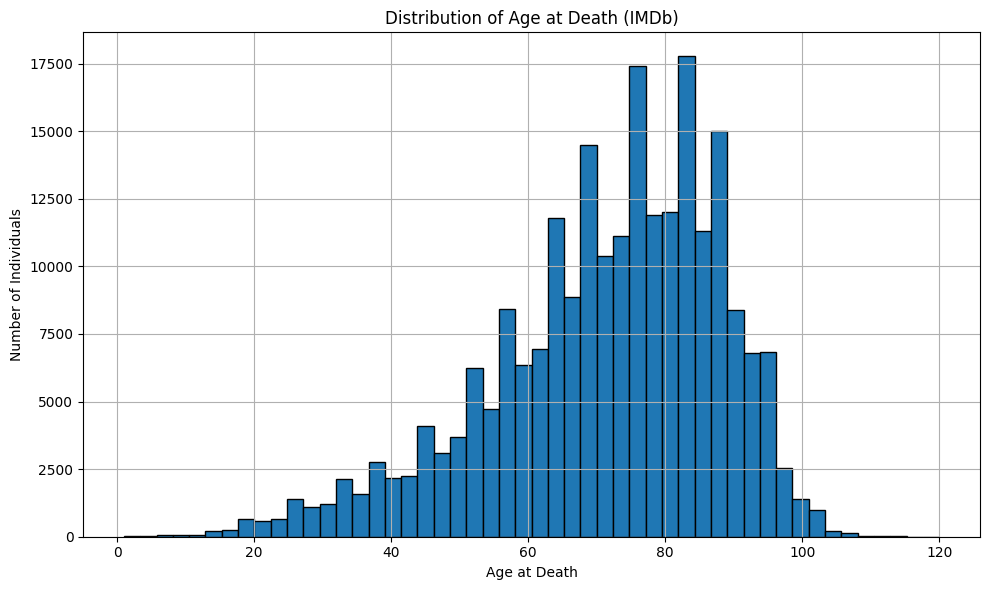

count    230265.000000
mean         71.288772
std          16.878917
min           1.000000
25%          62.000000
50%          74.000000
75%          84.000000
max         120.000000
Name: age_at_death, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load IMDb name.basics.tsv.gz
df = pd.read_csv("/content/drive/MyDrive/Gladyshev/data/name.basics.tsv", sep="\t", usecols=["birthYear", "deathYear"])

# Filter valid rows
df = df[(df['birthYear'] != '\\N') & (df['deathYear'] != '\\N')].copy()
df['birthYear'] = df['birthYear'].astype(int)
df['deathYear'] = df['deathYear'].astype(int)

# Calculate age at death
df['age_at_death'] = df['deathYear'] - df['birthYear']
df = df[(df['age_at_death'] > 0) & (df['age_at_death'] <= 120)]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['age_at_death'], bins=50, edgecolor='black')
plt.title("Distribution of Age at Death (IMDb)")
plt.xlabel("Age at Death")
plt.ylabel("Number of Individuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics
print(df['age_at_death'].describe())


In [4]:
import pandas as pd

# Load the full dataset
df = pd.read_csv("/content/drive/MyDrive/Gladyshev/data/name.basics.tsv", sep="\t", usecols=[
    "nconst", "primaryName", "birthYear", "deathYear", "primaryProfession"
])

# Filter and clean
df = df[(df["birthYear"] != "\\N") & (df["deathYear"] != "\\N")].copy()
df["birthYear"] = df["birthYear"].astype(int)
df["deathYear"] = df["deathYear"].astype(int)

# Compute age at death
df["age_at_death"] = df["deathYear"] - df["birthYear"]
df = df[(df["age_at_death"] > 0) & (df["age_at_death"] <= 120)]

# Output
print(f"Number of individuals with valid age at death: {len(df)}")
df.to_csv("imdb_all_deceased_with_age.csv", index=False)


Number of individuals with valid age at death: 230265


Summary statistics for age at death:
count    230265.000000
mean         71.288772
std          16.878917
min           1.000000
25%          62.000000
50%          74.000000
75%          84.000000
max         120.000000
Name: age_at_death, dtype: float64


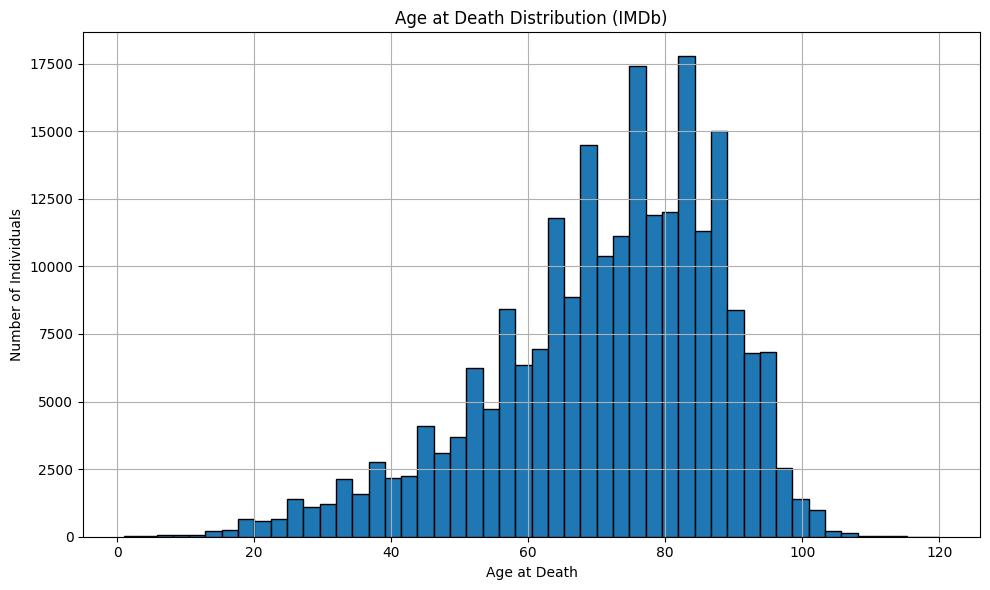

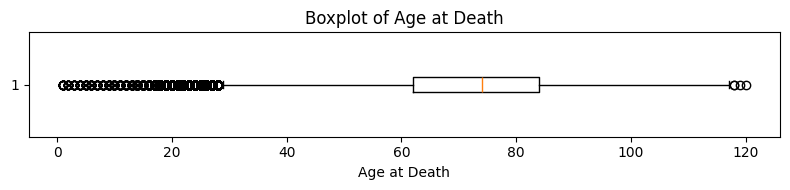


Top 10 primary professions:
primaryProfession
actor                               42185
actress                             24989
\N                                  21397
writer                              11864
archive_footage                     10846
actor,archive_footage                7840
actress,archive_footage              3957
miscellaneous                        2870
actor,soundtrack                     2584
actor,soundtrack,archive_footage     2413
Name: count, dtype: int64


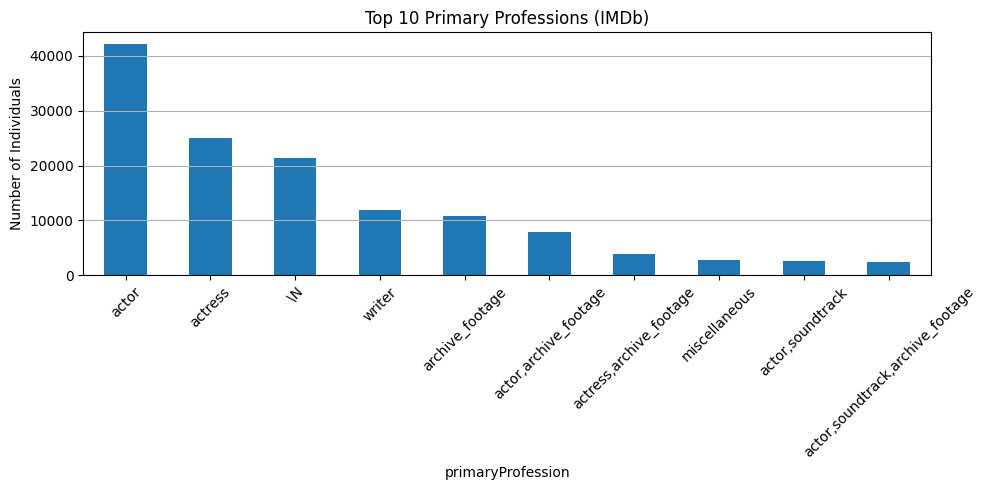

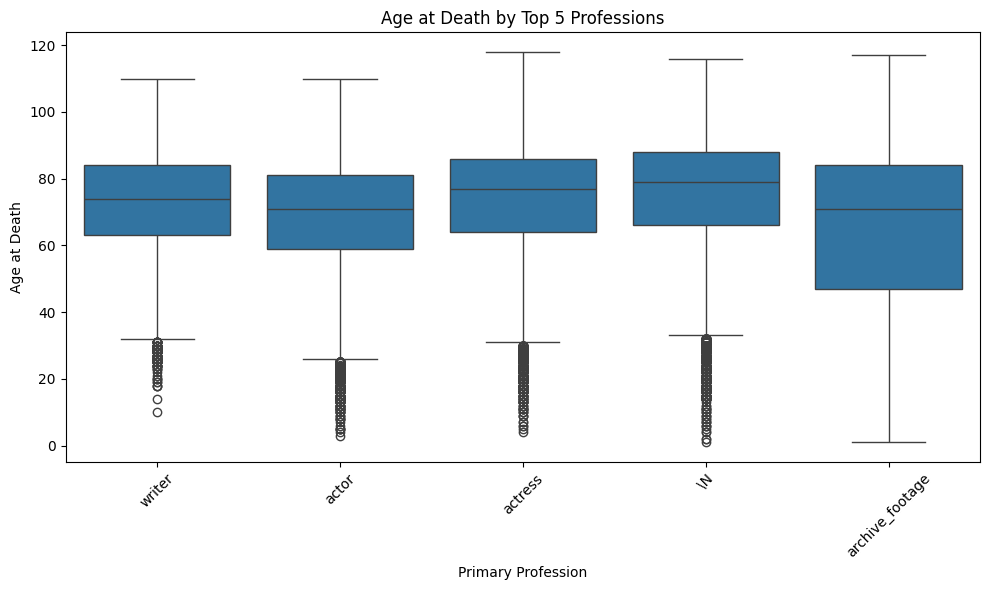

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV (adjust path if needed)
df = pd.read_csv("imdb_all_deceased_with_age.csv")

# === SUMMARY STATISTICS ===
print("Summary statistics for age at death:")
print(df['age_at_death'].describe())

# === HISTOGRAM ===
plt.figure(figsize=(10, 6))
plt.hist(df['age_at_death'], bins=50, edgecolor='black')
plt.title("Age at Death Distribution (IMDb)")
plt.xlabel("Age at Death")
plt.ylabel("Number of Individuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# === BOXPLOT ===
plt.figure(figsize=(8, 2))
plt.boxplot(df['age_at_death'], vert=False)
plt.title("Boxplot of Age at Death")
plt.xlabel("Age at Death")
plt.tight_layout()
plt.show()

# === TOP PROFESSIONS ===
top_prof = df['primaryProfession'].value_counts().head(10)
print("\nTop 10 primary professions:")
print(top_prof)

# Bar plot of top professions
plt.figure(figsize=(10, 5))
top_prof.plot(kind='bar')
plt.title("Top 10 Primary Professions (IMDb)")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === BOXPLOT BY TOP 5 PROFESSIONS ===
top5 = top_prof.index[:5]
df_top5 = df[df['primaryProfession'].isin(top5)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top5, x='primaryProfession', y='age_at_death')
plt.title("Age at Death by Top 5 Professions")
plt.ylabel("Age at Death")
plt.xlabel("Primary Profession")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
# Install tools
!pip install yt-dlp --quiet
!apt-get install -y ffmpeg > /dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()  # upload imdb_all_deceased_with_age.csv

In [7]:
import os
import subprocess
import pandas as pd

# Create output directory
os.makedirs("actor_audio_clips", exist_ok=True)

# Load actor data (limit to a few for speed)
df = pd.read_csv("imdb_all_deceased_with_age.csv")
actors = df[df['primaryProfession'].str.contains("actor", na=False)].dropna().head(5)

# Download 1 interview per actor using yt-dlp
for _, row in actors.iterrows():
    name = row['primaryName']
    query = f"{name} interview"
    safe_name = name.replace(" ", "_").replace("/", "_")

    print(f"\nDownloading: {query}")
    output_file = f"actor_audio_clips/{safe_name}.wav"

    cmd = [
        "yt-dlp",
        f"ytsearch1:{query}",
        "--extract-audio",
        "--audio-format", "wav",
        "--output", output_file,
        "--download-sections", "*00:00:30-00:01:30",
        "--quiet"
    ]

    subprocess.run(cmd)


Downloading: Fred Astaire interview

Downloading: John Belushi interview

Downloading: Ingmar Bergman interview

Downloading: Humphrey Bogart interview

Downloading: Marlon Brando interview


In [12]:
import os
import subprocess
import pandas as pd

# Setup output
os.makedirs("actor_audio_clips", exist_ok=True)

# Load IMDb CSV
df = pd.read_csv("imdb_all_deceased_with_age.csv")
actors = df[df['primaryProfession'].str.contains("actor", na=False)].dropna().head(5)

# Updated query and download
for _, row in actors.iterrows():
    name = row['primaryName']
    query = f"{name} actor only no interviewer"
    safe_name = name.replace(" ", "_").replace("/", "_")

    print(f"\n🎤 Searching for: {query}")
    output_file = f"actor_audio_clips/{safe_name}.wav"

    cmd = [
        "yt-dlp",
        f"ytsearch1:{query}",
        "--extract-audio",
        "--audio-format", "wav",
        "--output", output_file,
        "--download-sections", "*00:00:10-00:00:30",
        "--quiet"
    ]

    subprocess.run(cmd)



🎤 Searching for: Fred Astaire actor only no interviewer

🎤 Searching for: John Belushi actor only no interviewer

🎤 Searching for: Ingmar Bergman actor only no interviewer

🎤 Searching for: Humphrey Bogart actor only no interviewer

🎤 Searching for: Marlon Brando actor only no interviewer


In [15]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_meta_md5sum.txt

--2025-06-25 00:41:35--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_meta_md5sum.txt
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49 [text/plain]
Saving to: ‘imdb_meta_md5sum.txt’

imdb_meta_md5sum.tx 100%[===================>]      49  --.-KB/s    in 0s      

2025-06-25 00:41:35 (11.8 MB/s) - ‘imdb_meta_md5sum.txt’ saved [49/49]



In [16]:
import pandas as pd
import scipy.io

# Load IMDb names
imdb_df = pd.read_csv("/content/drive/MyDrive/Gladyshev/data/imdb_all_deceased_with_age.csv")
imdb_names = set(imdb_df['primaryName'].dropna().unique())

# Load imdb.mat (IMDB-WIKI metadata)
mat = scipy.io.loadmat("/content/drive/MyDrive/Gladyshev/data/imdb.mat")
mat_names_raw = mat['imdb'][0][0]['name'][0]

# Clean image names
mat_names_cleaned = {
    str(n[0]).split('/')[-1].replace("_", " ").replace(".jpg", "").strip()
    for n in mat_names_raw
}

# Find overlapping names
matched_names = imdb_names.intersection(mat_names_cleaned)
print(f"✅ Found {len(matched_names)} matches")

# Save to CSV
pd.DataFrame({'matched_name': sorted(matched_names)}).to_csv("matched_face_names.csv", index=False)


✅ Found 3332 matches


In [17]:
import pandas as pd
import scipy.io
from datetime import datetime

# Load your IMDb deceased data
imdb_df = pd.read_csv("/content/drive/MyDrive/Gladyshev/data/imdb_all_deceased_with_age.csv")
imdb_df = imdb_df[['primaryName', 'birthYear', 'deathYear', 'age_at_death']].dropna()
imdb_df['primaryName'] = imdb_df['primaryName'].str.strip()

# Load IMDB-WIKI metadata
mat = scipy.io.loadmat("/content/drive/MyDrive/Gladyshev/data/imdb.mat")
meta = mat["imdb"][0][0]

# Extract fields
names = [str(n[0]) for n in meta['name'][0]]
dob = meta['dob'][0]
photo_taken = meta['photo_taken'][0]

# Build face data with age at face
face_records = []
for i in range(len(names)):
    name = names[i].split("/")[-1].replace("_", " ").replace(".jpg", "").strip()
    try:
        birth_year = datetime.fromordinal(int(dob[i])).year if dob[i] > 0 else None
        photo_year = int(photo_taken[i])
        age_at_face = photo_year - birth_year if birth_year else None
        face_records.append((name, birth_year, photo_year, age_at_face))
    except:
        continue

faces_df = pd.DataFrame(face_records, columns=["name", "birthYear", "photo_year", "age_at_face"])
faces_df = faces_df.dropna(subset=["age_at_face"])

# Merge on name and birth year
merged = pd.merge(faces_df, imdb_df, how="inner", left_on=["name", "birthYear"], right_on=["primaryName", "birthYear"])

# Compute time to death
merged['time_to_death_at_face'] = merged['age_at_death'] - merged['age_at_face']

# Final table
final = merged[['name', 'age_at_face', 'age_at_death', 'time_to_death_at_face']]

# Save
final.to_csv("matched_faces_with_time_to_death.csv", index=False)
print("✅ Saved as matched_faces_with_time_to_death.csv")


✅ Saved as matched_faces_with_time_to_death.csv


In [18]:
import pandas as pd
import scipy.io
from datetime import datetime

# Load IMDb actor data
imdb_df = pd.read_csv("/content/drive/MyDrive/Gladyshev/data/imdb_all_deceased_with_age.csv")
imdb_df = imdb_df[['primaryName', 'birthYear', 'deathYear', 'age_at_death']].dropna()
imdb_df['primaryName'] = imdb_df['primaryName'].str.strip()
imdb_df['birthYear'] = imdb_df['birthYear'].astype(int)

# Load imdb.mat metadata
mat = scipy.io.loadmat("/content/drive/MyDrive/Gladyshev/data/imdb.mat")
meta = mat["imdb"][0][0]
names = [str(n[0]) for n in meta['name'][0]]
dob = meta['dob'][0]
photo_taken = meta['photo_taken'][0]

# Extract and clean face data
face_records = []
for i in range(len(names)):
    try:
        raw_name = names[i].split("/")[-1].replace("_", " ").replace(".jpg", "").strip()
        if dob[i] <= 0:
            continue
        birth_year = datetime.fromordinal(int(dob[i])).year
        photo_year = int(photo_taken[i])
        age_at_face = photo_year - birth_year
        if 0 < age_at_face <= 120:
            face_records.append((raw_name, birth_year, photo_year, age_at_face))
    except:
        continue

face_df = pd.DataFrame(face_records, columns=["name", "birthYear", "photo_year", "age_at_face"])

# Fuzzy merge preparation (±1 year)
expanded_face_rows = []
for delta in [-1, 0, 1]:
    temp = face_df.copy()
    temp["fuzzy_birthYear"] = temp["birthYear"] + delta
    expanded_face_rows.append(temp)

face_fuzzy_df = pd.concat(expanded_face_rows)

# Merge on name and fuzzy birth year
imdb_df = imdb_df.rename(columns={"primaryName": "name", "birthYear": "fuzzy_birthYear"})
merged = pd.merge(face_fuzzy_df, imdb_df, how="inner", on=["name", "fuzzy_birthYear"])

# Compute time-to-death at face
merged['time_to_death_at_face'] = merged['age_at_death'] - merged['age_at_face']

# Final result
final_df = merged[['name', 'age_at_face', 'age_at_death', 'time_to_death_at_face']]
final_df.to_csv("matched_faces_with_time_to_death_fuzzy.csv", index=False)

# === 📊 Summary Statistics ===
print(f"\n✅ Saved {len(final_df)} matched entries to 'matched_faces_with_time_to_death_fuzzy.csv'\n")

print("📈 Age at Face:")
print(final_df['age_at_face'].describe())

print("\n📉 Time to Death (years after photo):")
print(final_df['time_to_death_at_face'].describe())

print("\n🧓 Age at Death:")
print(final_df['age_at_death'].describe())



✅ Saved 27669 matched entries to 'matched_faces_with_time_to_death_fuzzy.csv'

📈 Age at Face:
count    27669.00000
mean        49.17778
std         17.82282
min          2.00000
25%         36.00000
50%         48.00000
75%         62.00000
max        118.00000
Name: age_at_face, dtype: float64

📉 Time to Death (years after photo):
count    27669.000000
mean        21.256930
std         14.954703
min        -51.000000
25%         10.000000
50%         18.000000
75%         31.000000
max         65.000000
Name: time_to_death_at_face, dtype: float64

🧓 Age at Death:
count    27669.000000
mean        70.434710
std         18.177372
min          7.000000
25%         58.000000
50%         74.000000
75%         84.000000
max        107.000000
Name: age_at_death, dtype: float64


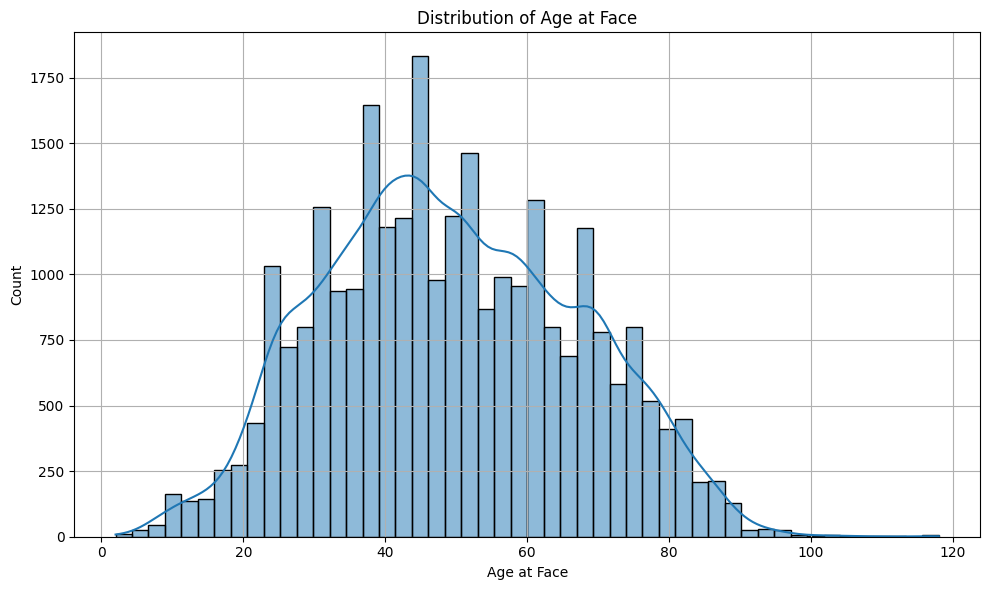

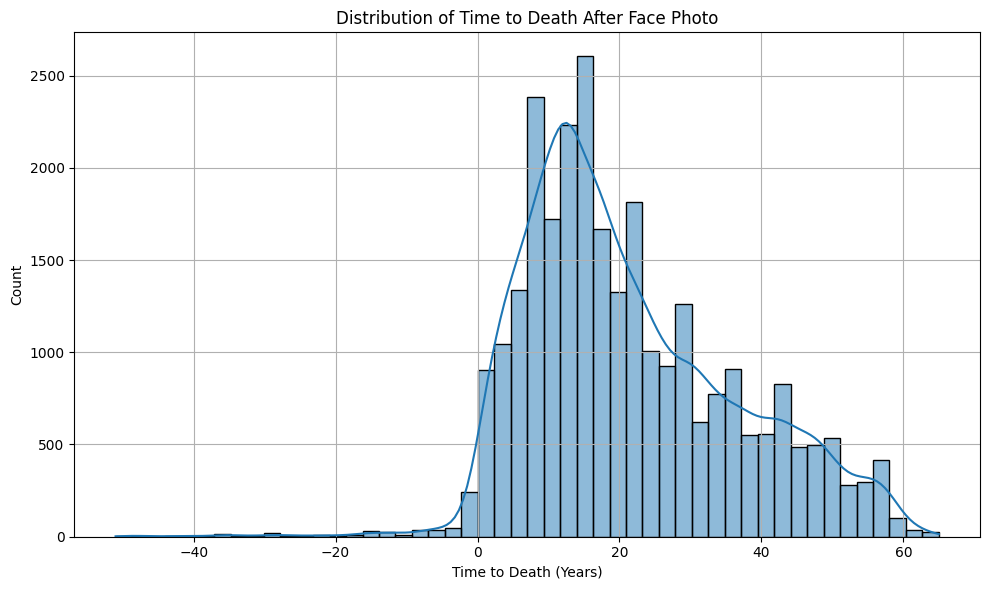

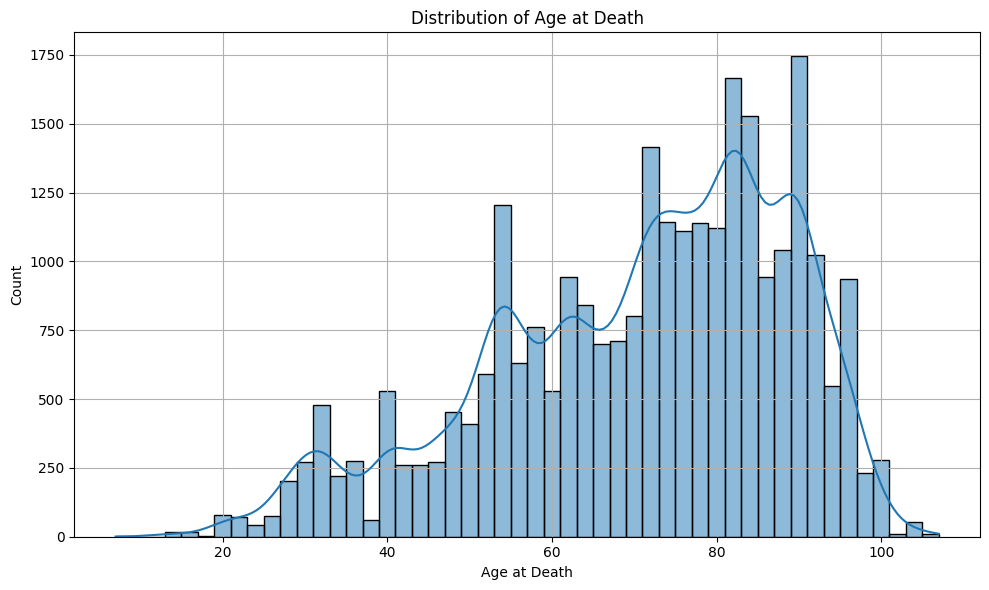

{'num_unique_names': 2752,
 'age_at_face_stats': count    27669.00000
 mean        49.17778
 std         17.82282
 min          2.00000
 25%         36.00000
 50%         48.00000
 75%         62.00000
 max        118.00000
 Name: age_at_face, dtype: float64,
 'time_to_death_stats': count    27669.000000
 mean        21.256930
 std         14.954703
 min        -51.000000
 25%         10.000000
 50%         18.000000
 75%         31.000000
 max         65.000000
 Name: time_to_death_at_face, dtype: float64,
 'age_at_death_stats': count    27669.000000
 mean        70.434710
 std         18.177372
 min          7.000000
 25%         58.000000
 50%         74.000000
 75%         84.000000
 max        107.000000
 Name: age_at_death, dtype: float64}

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the fuzzy matched data
df = pd.read_csv("matched_faces_with_time_to_death_fuzzy.csv")

# Number of unique names
num_unique_names = df['name'].nunique()

# Summary statistics
stats_age_at_face = df['age_at_face'].describe()
stats_time_to_death = df['time_to_death_at_face'].describe()
stats_age_at_death = df['age_at_death'].describe()

# Plot distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['age_at_face'], bins=50, kde=True)
plt.title("Distribution of Age at Face")
plt.xlabel("Age at Face")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['time_to_death_at_face'], bins=50, kde=True)
plt.title("Distribution of Time to Death After Face Photo")
plt.xlabel("Time to Death (Years)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['age_at_death'], bins=50, kde=True)
plt.title("Distribution of Age at Death")
plt.xlabel("Age at Death")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Output summary statistics and number of unique names
{
    "num_unique_names": num_unique_names,
    "age_at_face_stats": stats_age_at_face,
    "time_to_death_stats": stats_time_to_death,
    "age_at_death_stats": stats_age_at_death
}


📦 Number of unique individuals: 2752

📈 Summary of photo counts per individual:
count    2752.000000
mean       10.054142
std        24.499935
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       540.000000
Name: count, dtype: float64


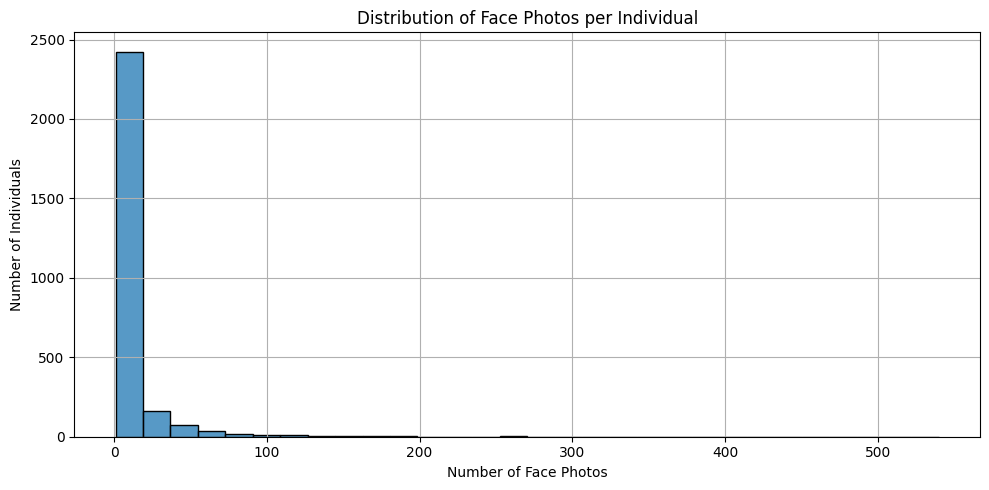

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your fuzzy match file
df = pd.read_csv("matched_faces_with_time_to_death_fuzzy.csv")

# 📊 Count how many face photos per name
photo_counts = df['name'].value_counts()

# 🔢 Summary
print("📦 Number of unique individuals:", photo_counts.shape[0])
print("\n📈 Summary of photo counts per individual:")
print(photo_counts.describe())

# 📉 Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(photo_counts, bins=30, kde=False)
plt.title("Distribution of Face Photos per Individual")
plt.xlabel("Number of Face Photos")
plt.ylabel("Number of Individuals")
plt.grid(True)
plt.tight_layout()
plt.show()


📦 Number of unique individuals: 2752

📈 Summary of photo counts per individual:
count    2752.000000
mean       10.054142
std        24.499935
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       540.000000
Name: count, dtype: float64


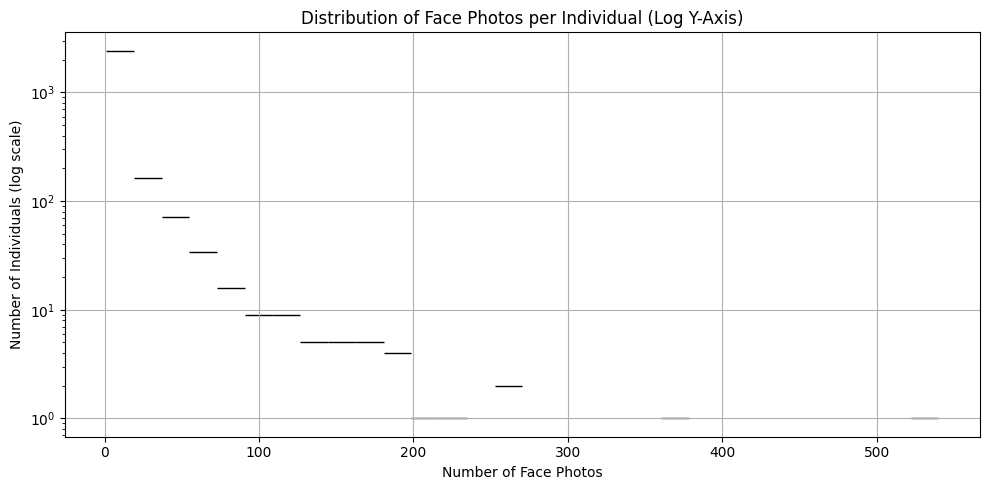

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your fuzzy match file
df = pd.read_csv("matched_faces_with_time_to_death_fuzzy.csv")

# 📊 Count how many face photos per name
photo_counts = df['name'].value_counts()

# 🔢 Summary
print("📦 Number of unique individuals:", photo_counts.shape[0])
print("\n📈 Summary of photo counts per individual:")
print(photo_counts.describe())

# 📉 Plot distribution with log scale
plt.figure(figsize=(10, 5))
sns.histplot(photo_counts, bins=30, kde=False, log_scale=(False, True))
plt.title("Distribution of Face Photos per Individual (Log Y-Axis)")
plt.xlabel("Number of Face Photos")
plt.ylabel("Number of Individuals (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()


📦 Number of unique individuals: 2752

📈 Summary of photo counts per individual:
count    2752.000000
mean       10.054142
std        24.499935
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       540.000000
Name: count, dtype: float64


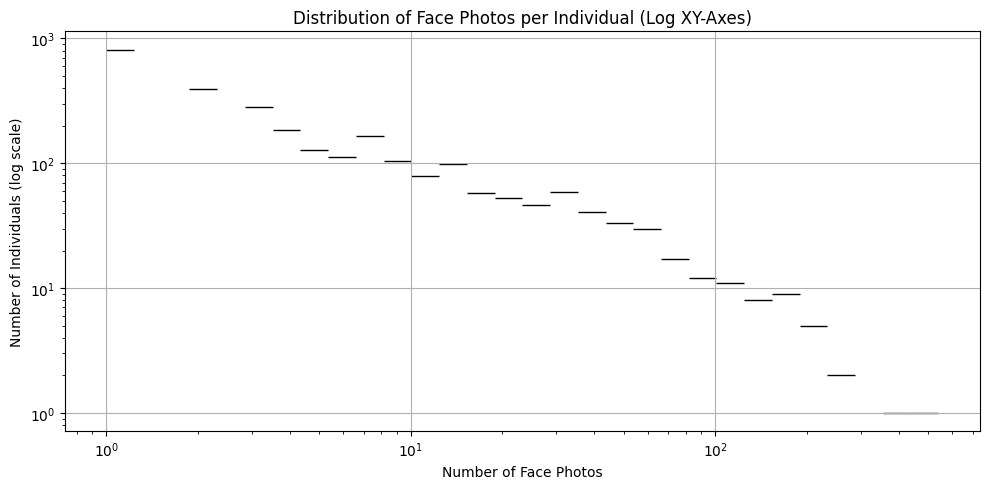

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your fuzzy match file
df = pd.read_csv("matched_faces_with_time_to_death_fuzzy.csv")

# 📊 Count how many face photos per name
photo_counts = df['name'].value_counts()

# 🔢 Summary
print("📦 Number of unique individuals:", photo_counts.shape[0])
print("\n📈 Summary of photo counts per individual:")
print(photo_counts.describe())

# 📉 Plot distribution with log scale
plt.figure(figsize=(10, 5))
sns.histplot(photo_counts, bins=30, kde=False, log_scale=(True, True))
plt.title("Distribution of Face Photos per Individual (Log XY-Axes)")
plt.xlabel("Number of Face Photos")
plt.ylabel("Number of Individuals (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()


📦 Number of unique individuals: 2752

📈 Summary of photo counts per individual:
count    2752.000000
mean       10.054142
std        24.499935
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       540.000000
Name: count, dtype: float64


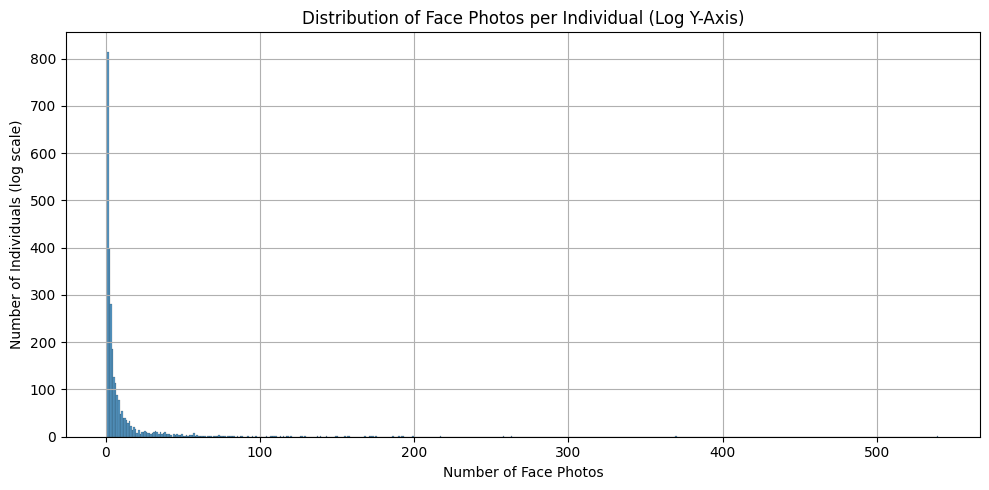

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your fuzzy match file
df = pd.read_csv("matched_faces_with_time_to_death_fuzzy.csv")

# 📊 Count how many face photos per name
photo_counts = df['name'].value_counts()

# 🔢 Summary
print("📦 Number of unique individuals:", photo_counts.shape[0])
print("\n📈 Summary of photo counts per individual:")
print(photo_counts.describe())

# 📉 Plot distribution with log scale
plt.figure(figsize=(10, 5))
sns.histplot(photo_counts)
plt.title("Distribution of Face Photos per Individual (Log Y-Axis)")
plt.xlabel("Number of Face Photos")
plt.ylabel("Number of Individuals (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Load the dataset
df = pd.read_csv("matched_faces_with_time_to_death_fuzzy.csv")

# Group and compute longitudinal stats
grouped = df.groupby('name').agg(
    n_photos=('age_at_face', 'count'),
    min_age_at_face=('age_at_face', 'min'),
    max_age_at_face=('age_at_face', 'max'),
    span_years=('age_at_face', lambda x: x.max() - x.min()),
    avg_time_to_death=('time_to_death_at_face', 'mean')
).reset_index()

grouped['is_longitudinal'] = grouped['n_photos'] >= 2

# Summary
print("📦 Unique individuals:", len(grouped))
print("\n📈 Summary of longitudinal stats:")
print(grouped.describe())


📦 Unique individuals: 2752

📈 Summary of longitudinal stats:
          n_photos  min_age_at_face  max_age_at_face   span_years  \
count  2752.000000      2752.000000      2752.000000  2752.000000   
mean     10.054142        47.070858        55.711846     8.640988   
std      24.499935        17.968380        19.126761    13.359434   
min       1.000000         2.000000         2.000000     0.000000   
25%       1.000000        34.000000        41.000000     0.000000   
50%       3.000000        45.000000        56.000000     0.000000   
75%       8.000000        58.000000        70.000000    14.000000   
max     540.000000       118.000000       118.000000    54.000000   

       avg_time_to_death  
count        2752.000000  
mean           21.125600  
std            15.272424  
min           -51.000000  
25%            11.000000  
50%            19.000000  
75%            31.000000  
max            64.000000  


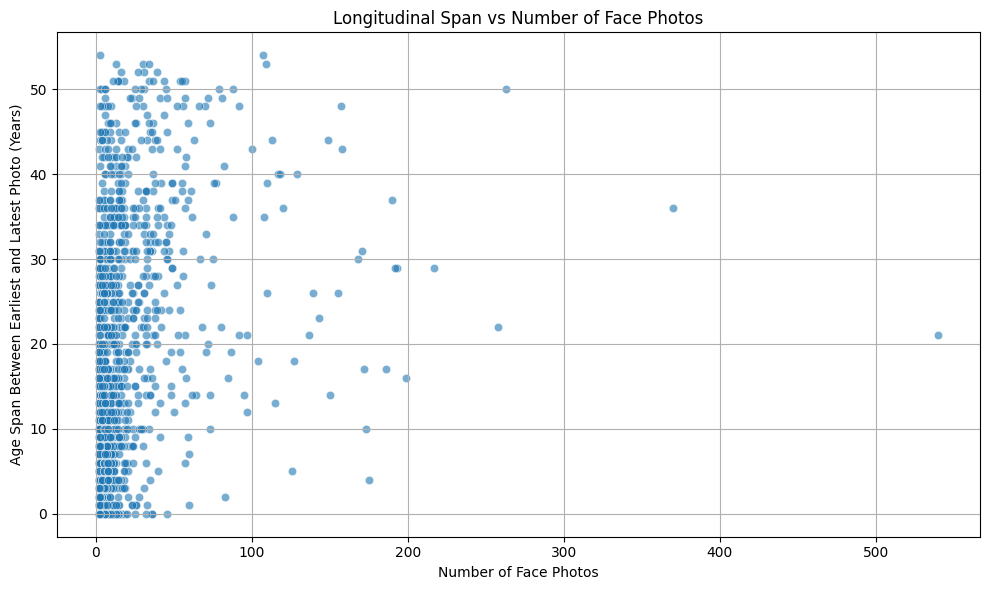

In [35]:
# Filter only individuals with more than one photo
longitudinal = grouped[grouped['n_photos'] > 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=longitudinal, x='n_photos', y='span_years', alpha=0.6)
plt.title("Longitudinal Span vs Number of Face Photos")
plt.xlabel("Number of Face Photos")
plt.ylabel("Age Span Between Earliest and Latest Photo (Years)")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Cleaned dataset summary:
          n_photos  min_age_at_face  max_age_at_face   span_years  \
count  2686.000000      2686.000000      2686.000000  2686.000000   
mean     10.164185        46.364855        54.753537     8.388682   
std      24.712986        17.294712        18.571327    12.950187   
min       1.000000         2.000000         2.000000     0.000000   
25%       1.000000        34.000000        41.000000     0.000000   
50%       3.000000        44.000000        55.500000     0.000000   
75%       8.000000        58.000000        69.000000    14.000000   
max     540.000000        99.000000        99.000000    54.000000   

       avg_time_to_death  
count        2686.000000  
mean           22.265471  
std            13.798304  
min             0.000000  
25%            11.578571  
50%            19.663690  
75%            31.259868  
max            64.000000  


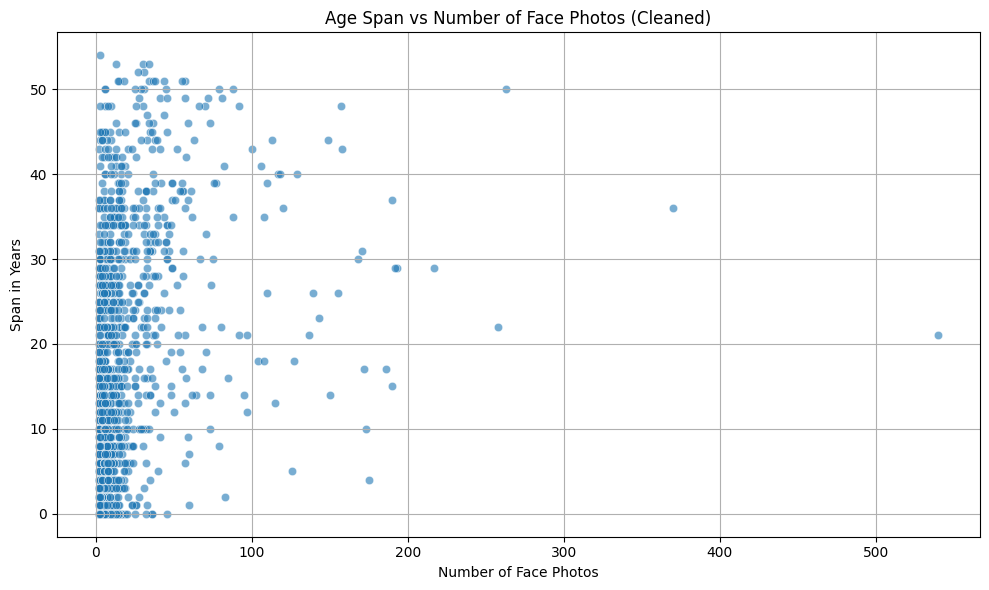

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv("matched_faces_with_time_to_death_fuzzy.csv")

# Remove negative time-to-death values
df = df[df['time_to_death_at_face'] >= 0]

# Compute per-name longitudinal statistics
grouped = df.groupby("name").agg(
    n_photos=("age_at_face", "count"),
    min_age_at_face=("age_at_face", "min"),
    max_age_at_face=("age_at_face", "max"),
    span_years=("age_at_face", lambda x: x.max() - x.min()),
    avg_time_to_death=("time_to_death_at_face", "mean")
).reset_index()

# Flag longitudinal cases
grouped["is_longitudinal"] = grouped["n_photos"] >= 2

# Summary statistics
print("✅ Cleaned dataset summary:")
print(grouped.describe())

# Optional plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped[grouped["is_longitudinal"]], x="n_photos", y="span_years", alpha=0.6)
plt.title("Age Span vs Number of Face Photos (Cleaned)")
plt.xlabel("Number of Face Photos")
plt.ylabel("Span in Years")
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# Load your dataset
df = pd.read_csv("matched_faces_with_time_to_death_fuzzy.csv")

# Remove invalid rows
df = df[df["time_to_death_at_face"] >= 0]

# Compute per-individual statistics
grouped = df.groupby("name").agg(
    n_photos=("age_at_face", "count"),
    min_age_at_face=("age_at_face", "min"),
    max_age_at_face=("age_at_face", "max"),
    span_years=("age_at_face", lambda x: x.max() - x.min()),
    avg_time_to_death=("time_to_death_at_face", "mean")
).reset_index()

# Mark longitudinal cases
grouped["is_longitudinal"] = grouped["n_photos"] >= 2

# Save to CSV
grouped.to_csv("longitudinal_stats_cleaned.csv", index=False)
print("✅ Saved to longitudinal_stats_cleaned.csv")

✅ Saved to longitudinal_stats_cleaned.csv


In [43]:
# Group by name
grouped = df.groupby("name").agg(
    n_photos=("age_at_face", "count"),
    min_age_at_face=("age_at_face", "min"),
    max_age_at_face=("age_at_face", "max"),
    span_years=("age_at_face", lambda x: x.max() - x.min()),
    avg_time_to_death=("time_to_death_at_face", "mean")
).reset_index()

# Flag longitudinal individuals
grouped["is_longitudinal"] = grouped["n_photos"] >= 2

# Save if you want
grouped.to_csv("longitudinal_stats_cleaned_rebuilt.csv", index=False)
print("✅ Rebuilt and saved to longitudinal_stats_cleaned_rebuilt.csv")

grouped.head()


✅ Rebuilt and saved to longitudinal_stats_cleaned_rebuilt.csv


,name,n_photos,min_age_at_face,max_age_at_face,span_years,avg_time_to_death,is_longitudinal
0,Aaliyah,18,18,22,4,0.666667,True
1,Aaron Carter,50,12,24,12,18.160000,True
2,Aaron Russo,2,62,62,0,2.000000,True
3,Aaron Spelling,7,68,76,8,8.285714,True
4,Abbas Kiarostami,7,69,73,4,5.000000,True


          n_photos  min_age_at_face  max_age_at_face   span_years  \
count  2686.000000      2686.000000      2686.000000  2686.000000   
mean     10.164185        46.364855        54.753537     8.388682   
std      24.712986        17.294712        18.571327    12.950187   
min       1.000000         2.000000         2.000000     0.000000   
25%       1.000000        34.000000        41.000000     0.000000   
50%       3.000000        44.000000        55.500000     0.000000   
75%       8.000000        58.000000        69.000000    14.000000   
max     540.000000        99.000000        99.000000    54.000000   

       avg_time_to_death  
count        2686.000000  
mean           22.265471  
std            13.798304  
min             0.000000  
25%            11.578571  
50%            19.663690  
75%            31.259868  
max            64.000000  

🧍‍♂️ Longitudinal counts:
 is_longitudinal
True     1890
False     796
Name: count, dtype: int64


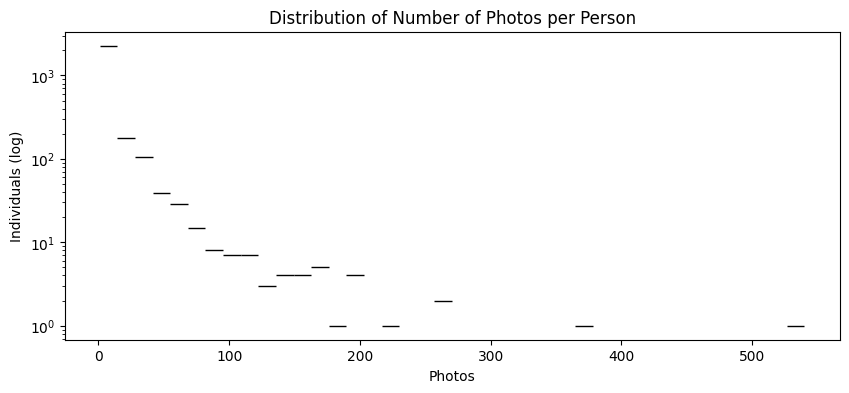

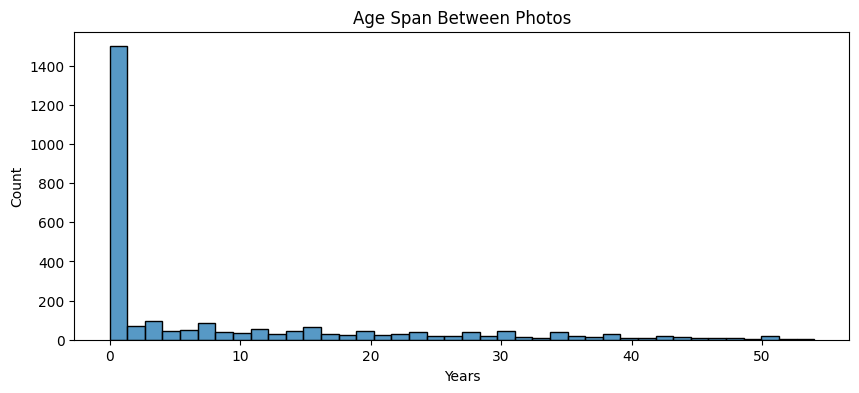

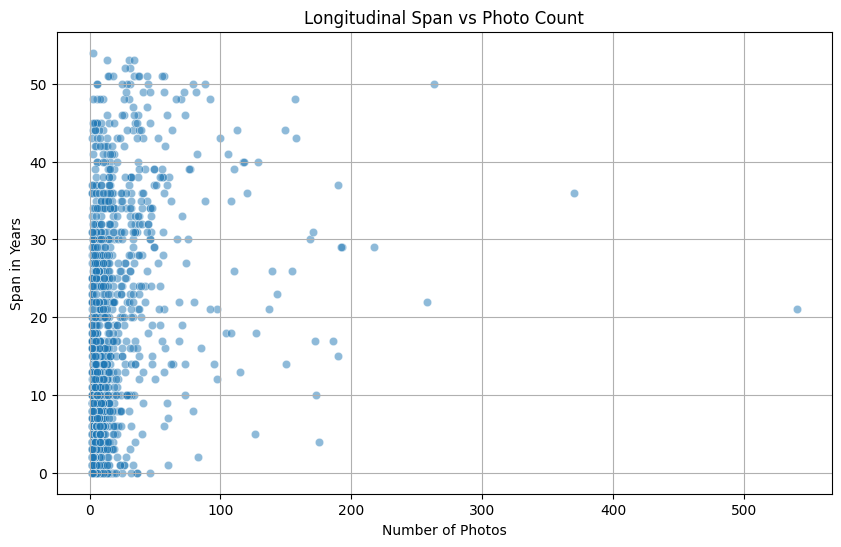

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Summary
print(grouped.describe())
print("\n🧍‍♂️ Longitudinal counts:\n", grouped['is_longitudinal'].value_counts())

# 📉 Histogram: photo count
plt.figure(figsize=(10, 4))
sns.histplot(grouped['n_photos'], bins=40, log_scale=(False, True))
plt.title("Distribution of Number of Photos per Person")
plt.xlabel("Photos")
plt.ylabel("Individuals (log)")
plt.show()

# 📉 Histogram: span years
plt.figure(figsize=(10, 4))
sns.histplot(grouped['span_years'], bins=40)
plt.title("Age Span Between Photos")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

# 📉 Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped[grouped["is_longitudinal"]], x="n_photos", y="span_years", alpha=0.5)
plt.title("Longitudinal Span vs Photo Count")
plt.xlabel("Number of Photos")
plt.ylabel("Span in Years")
plt.grid(True)
plt.show()


In [45]:
import requests
import pandas as pd

def get_cause_of_death(name):
    """
    Queries Wikidata for a given person's cause of death.
    Returns cause label(s) or None.
    """
    query = f"""
    SELECT ?causeLabel WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 3
    """

    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    response = requests.get(url, params={'query': query}, headers=headers)

    if response.status_code != 200:
        return None

    results = response.json()['results']['bindings']
    if not results:
        return None

    # Return all causes found (could be multiple)
    return [r['causeLabel']['value'] for r in results]

# 🧪 Test it
names = ["Paul Walker", "Heath Ledger", "Robin Williams", "James Dean", "Amy Winehouse"]

for name in names:
    causes = get_cause_of_death(name)
    print(f"{name}: {', '.join(causes) if causes else 'Not found'}")


Paul Walker: single-vehicle accident, single-vehicle accident
Heath Ledger: poisoning by drugs, poisoning by drugs
Robin Williams: hanging, hanging, disease
James Dean: car collision, car collision, spinal cord neoplasm
Amy Winehouse: alcohol intoxication


In [46]:
import requests
import time

def get_cause_of_death(name):
    query = f"""
    SELECT ?causeLabel WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 3
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}

    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        return ", ".join([r['causeLabel']['value'] for r in results])
    except:
        return None


In [47]:
# Get unique names
names = df["name"].dropna().unique()

# Initialize cache to avoid repeat queries
cause_dict = {}

# Iterate through names (slow loop: ~1–2s per name)
for i, name in enumerate(names):
    if name not in cause_dict:
        cause = get_cause_of_death(name)
        cause_dict[name] = cause
        time.sleep(1.2)  # Respect rate limits

    if i % 50 == 0:
        print(f"🔁 Processed {i}/{len(names)}")

# Save to dataframe
cause_df = pd.DataFrame(list(cause_dict.items()), columns=["name", "cause_of_death"])

# Merge with original
merged = df.merge(cause_df, on="name", how="left")

# Save final result
merged.to_csv("longitudinal_with_causes.csv", index=False)
print("✅ Saved as longitudinal_with_causes.csv")


🔁 Processed 0/2686
🔁 Processed 50/2686
🔁 Processed 100/2686
🔁 Processed 150/2686
🔁 Processed 200/2686
🔁 Processed 250/2686
🔁 Processed 300/2686
🔁 Processed 350/2686
🔁 Processed 400/2686
🔁 Processed 450/2686
🔁 Processed 500/2686
🔁 Processed 550/2686
🔁 Processed 600/2686
🔁 Processed 650/2686
🔁 Processed 700/2686
🔁 Processed 750/2686
🔁 Processed 800/2686
🔁 Processed 850/2686
🔁 Processed 900/2686
🔁 Processed 950/2686
🔁 Processed 1000/2686
🔁 Processed 1050/2686
🔁 Processed 1100/2686
🔁 Processed 1150/2686
🔁 Processed 1200/2686
🔁 Processed 1250/2686
🔁 Processed 1300/2686
🔁 Processed 1350/2686
🔁 Processed 1400/2686
🔁 Processed 1450/2686
🔁 Processed 1500/2686
🔁 Processed 1550/2686
🔁 Processed 1600/2686
🔁 Processed 1650/2686
🔁 Processed 1700/2686
🔁 Processed 1750/2686
🔁 Processed 1800/2686
🔁 Processed 1850/2686
🔁 Processed 1900/2686
🔁 Processed 1950/2686
🔁 Processed 2000/2686
🔁 Processed 2050/2686
🔁 Processed 2100/2686
🔁 Processed 2150/2686
🔁 Processed 2200/2686
🔁 Processed 2250/2686
🔁 Processed

In [2]:
!find "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered" -type f | wc -l

find: ‘/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered’: No such file or directory
0


In [53]:
# --- 📦 LIBRARIES ---
import os
import pandas as pd

# --- 📂 PATHS ---
causes_path = "/content/drive/MyDrive/Gladyshev/data/Cleaned_Causes_of_Death_filled.csv"
deceased_path = "/content/drive/MyDrive/Gladyshev/data/imdb_all_deceased_with_age.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered"
output_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata.csv"

# --- 🧬 LOAD FILES ---
causes = pd.read_csv(causes_path)
deceased = pd.read_csv(deceased_path)

# --- 🪪 RENAME FOR CONSISTENCY ---
deceased = deceased.rename(columns={"primaryName": "name", "nconst": "imdb_id"})

# --- 🔗 MERGE TO GET IMDb IDs ---
meta = causes.merge(deceased[["name", "imdb_id"]], on="name", how="left")
meta = meta.dropna(subset=["imdb_id", "time_to_death_at_face"])
meta["imdb_id"] = meta["imdb_id"].astype(str)

# --- 🖼️ MAP IMAGE FILES ---
image_files = os.listdir(image_dir)
file_map = {f.split("_")[0]: f for f in image_files if f.endswith(".jpg")}
meta["image_file"] = meta["imdb_id"].map(file_map)

# --- 💾 SAVE ---
meta.to_csv(output_path, index=False)
print(f"✅ Saved master metadata to: {output_path}")
print("📐 Final shape:", meta.shape)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered'

In [54]:
!ls "/content/drive/MyDrive/Gladyshev/data"


41467_2025_56579_MOESM14_ESM.csv
bridge2ai-voice-an-ethically-sourced-diverse-voice-dataset-linked-to-health-information-2.0.0
Cleaned_Causes_of_Death.csv
Cleaned_Causes_of_Death_filled.csv
crema-d-mirror-main
crema-d-mirror-main.zip
dist.png
gender.png
imdb_all_deceased_with_age.csv
imdb_crop
imdb.mat
imdb-tar
imdb-untar
longitudinal_imdb_ids.csv
longitudinal_stats_cleaned.csv
longitudinal_stats_cleaned_rebuilt.csv
Longitudinal_Stats_per_Name.csv
longitudinal_with_causes.csv
longitudinal_with_causes_filled.csv
matched_face_names.csv
matched_faces_with_time_to_death.csv
matched_faces_with_time_to_death_fuzzy.csv
name.basics.tsv


In [2]:
# --- 📦 LIBRARIES ---
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# --- 📂 PATHS ---
metadata_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata_with_gender.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip"

# --- 📋 LOAD METADATA ---
df_meta = pd.read_csv(metadata_path)
df_meta = df_meta.drop(columns=["image_file"], errors="ignore")  # drop image_file if it exists
df_meta = df_meta.dropna(subset=["imdb_id", "time_to_death_at_face"])
df_meta["imdb_id"] = df_meta["imdb_id"].astype(str)

# Basic stats
print(f"✅ Metadata loaded: {df_meta.shape[0]} images across {df_meta.shape[1]} features")
actor_counts = df_meta["imdb_id"].value_counts()
print(f"🎭 Total Unique Actors: {df_meta['imdb_id'].nunique()}")
print(f"📸 Total Images: {df_meta.shape[0]}")
print(f"📊 Avg Images/Actor: {actor_counts.mean():.2f}, Median: {actor_counts.median()}, Min: {actor_counts.min()}, Max: {actor_counts.max()}, Std: {actor_counts.std():.2f}")

# --- ⚙️ ENCODER FOR CAUSE OF DEATH ---
df_meta["cause_of_death"] = df_meta["cause_of_death"].fillna("unknown")
cause_encoder = OneHotEncoder(handle_unknown="ignore")
cause_encoder.fit(df_meta[["cause_of_death"]])

# --- 🖼️ MATCH IMAGES ---
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
image_records = []

for f in image_files:
    imdb_id = f.split("_")[0]
    if imdb_id in set(df_meta["imdb_id"]):
        meta_rows = df_meta[df_meta["imdb_id"] == imdb_id]
        for _, row in meta_rows.iterrows():
            image_records.append({
                "imdb_id": imdb_id,
                "name": row["name"],
                "gender": row.get("gender", None),
                "age_at_face": row.get("age_at_face", None),
                "age_at_death": row.get("age_at_death", None),
                "cause_of_death": row.get("cause_of_death", "unknown"),
                "time_to_death_at_face": row["time_to_death_at_face"],
                "image_file": f
            })

df_images = pd.DataFrame(image_records)
print(f"✅ Matched {len(df_images)} image entries across {df_images['imdb_id'].nunique()} actors")

# --- 🧼 IMAGE + METADATA FEATURE CONSTRUCTION ---
def load_image(path, size=(64, 64)):
    try:
        img = Image.open(path).convert("L").resize(size)
        return np.array(img).flatten()
    except:
        return None

X = []
y = []

print("📸 Loading and processing images with metadata...")
for _, row in tqdm(df_images.iterrows(), total=len(df_images)):
    img_path = os.path.join(image_dir, row["image_file"])
    img_array = load_image(img_path)
    if img_array is not None:
        age_face = row["age_at_face"] or 0
        age_death = row["age_at_death"] or 0
        gender = row.get("gender", "").lower()
        gender_encoded = 1 if gender == "female" else 0
        cause_vector = cause_encoder.transform([[row["cause_of_death"]]])[0]
        metadata = np.array([age_face, age_death, gender_encoded])
        full_features = np.concatenate([img_array, metadata, cause_vector])
        X.append(full_features)
        y.append(row["time_to_death_at_face"])

X = np.array(X)
y = np.array(y)

# --- 🔄 NORMALIZE NUMERIC METADATA (last 3 before cause_of_death one-hot) ---
n_cause = cause_encoder.transform([["unknown"]]).shape[1]
scaler = StandardScaler()
X[:, -3 - n_cause : -n_cause] = scaler.fit_transform(X[:, -3 - n_cause : -n_cause])

print(f"✅ Final feature matrix: {X.shape[0]} samples × {X.shape[1]} features")

# --- 🔀 SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 🤖 TRAIN MODELS ---
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- 📊 EVALUATE ---
def report(model_name, y_true, y_pred):
    print(f"\n📊 {model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")

report("Linear Regression", y_test, lr_preds)
report("Random Forest", y_test, rf_preds)

# --- 📈 PLOTS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Random Forest")

plt.tight_layout()
plt.show()

✅ Metadata loaded: 29001 images across 7 features
🎭 Total Unique Actors: 2903
📸 Total Images: 29001
📊 Avg Images/Actor: 9.99, Median: 3.0, Min: 1, Max: 540, Std: 24.02
✅ Matched 945743 image entries across 1142 actors
📸 Loading and processing images with metadata...


  0%|          | 0/945743 [00:00<?, ?it/s]


AttributeError: 'float' object has no attribute 'lower'

In [4]:
# --- 📦 LIBRARIES ---
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# --- 📂 PATHS ---
metadata_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata_with_gender.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip"

# --- 📋 LOAD METADATA ---
df_meta = pd.read_csv(metadata_path)
df_meta = df_meta.drop(columns=["image_file"], errors="ignore")  # drop image_file if it exists
df_meta = df_meta.dropna(subset=["imdb_id", "time_to_death_at_face"])
df_meta["imdb_id"] = df_meta["imdb_id"].astype(str)

# Basic stats
print(f"✅ Metadata loaded: {df_meta.shape[0]} images across {df_meta.shape[1]} features")
actor_counts = df_meta["imdb_id"].value_counts()
print(f"🎭 Total Unique Actors: {df_meta['imdb_id'].nunique()}")
print(f"📸 Total Images: {df_meta.shape[0]}")
print(f"📊 Avg Images/Actor: {actor_counts.mean():.2f}, Median: {actor_counts.median()}, Min: {actor_counts.min()}, Max: {actor_counts.max()}, Std: {actor_counts.std():.2f}")

# --- ⚙️ ENCODER FOR CAUSE OF DEATH ---
df_meta["cause_of_death"] = df_meta["cause_of_death"].fillna("unknown")
cause_encoder = OneHotEncoder(handle_unknown="ignore")
cause_encoder.fit(df_meta[["cause_of_death"]])

# --- 🖼️ MATCH IMAGES TO METADATA (Optimized) ---
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
grouped_meta = defaultdict(list)
for _, row in df_meta.iterrows():
    grouped_meta[row["imdb_id"]].append(row)

image_records = []
for f in tqdm(image_files, desc="🔍 Matching images to metadata"):
    imdb_id = f.split("_")[0]
    if imdb_id in grouped_meta:
        for row in grouped_meta[imdb_id]:
            image_records.append({
                "imdb_id": imdb_id,
                "name": row["name"],
                "gender": row.get("gender", None),
                "age_at_face": row.get("age_at_face", None),
                "age_at_death": row.get("age_at_death", None),
                "cause_of_death": row.get("cause_of_death", "unknown"),
                "time_to_death_at_face": row["time_to_death_at_face"],
                "image_file": f
            })

df_images = pd.DataFrame(image_records)
print(f"✅ Matched {len(df_images)} image entries across {df_images['imdb_id'].nunique()} actors")

# --- 🧼 IMAGE + METADATA FEATURE CONSTRUCTION ---
def load_image(path, size=(64, 64)):
    try:
        img = Image.open(path).convert("L").resize(size)
        return np.array(img).flatten()
    except:
        return None

X = []
y = []

print("📸 Loading and processing images with metadata...")
for _, row in tqdm(df_images.iterrows(), total=len(df_images)):
    img_path = os.path.join(image_dir, row["image_file"])
    img_array = load_image(img_path)
    if img_array is not None:
        age_face = row["age_at_face"] or 0
        age_death = row["age_at_death"] or 0
        gender = row.get("gender", "").lower()
        gender_encoded = 1 if gender == "female" else 0
        cause_vector = cause_encoder.transform([[row["cause_of_death"]]])[0]
        metadata = np.array([age_face, age_death, gender_encoded])
        full_features = np.concatenate([img_array, metadata, cause_vector])
        X.append(full_features)
        y.append(row["time_to_death_at_face"])

X = np.array(X)
y = np.array(y)

# --- 🔄 NORMALIZE NUMERIC METADATA (last 3 before cause_of_death one-hot) ---
n_cause = cause_encoder.transform([["unknown"]]).shape[1]
scaler = StandardScaler()
X[:, -3 - n_cause : -n_cause] = scaler.fit_transform(X[:, -3 - n_cause : -n_cause])

print(f"✅ Final feature matrix: {X.shape[0]} samples × {X.shape[1]} features")

# --- 🔀 SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 🤖 TRAIN MODELS ---
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- 📊 EVALUATE ---
def report(model_name, y_true, y_pred):
    print(f"\n📊 {model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")

report("Linear Regression", y_test, lr_preds)
report("Random Forest", y_test, rf_preds)

# --- 📈 PLOTS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Random Forest")

plt.tight_layout()
plt.show()


✅ Metadata loaded: 29001 images across 7 features
🎭 Total Unique Actors: 2903
📸 Total Images: 29001
📊 Avg Images/Actor: 9.99, Median: 3.0, Min: 1, Max: 540, Std: 24.02


🔍 Matching images to metadata: 100%|██████████| 15282/15282 [00:13<00:00, 1135.21it/s]


✅ Matched 1258137 image entries across 1437 actors
📸 Loading and processing images with metadata...


  0%|          | 0/1258137 [00:00<?, ?it/s]


AttributeError: 'float' object has no attribute 'lower'

In [5]:
print(f"Found {len(image_files)} image files in: {image_dir}")
print(f"Example filenames: {image_files[:5]}")


Found 15282 image files in: /content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip
Example filenames: ['nm0821739_rm3457785088_1976-5-5_2006.jpg', 'nm0641939_rm654547456_1941-4-20_1997.jpg', 'nm0641939_rm813944320_1941-4-20_1977.jpg', 'nm0641939_rm521647104_1941-4-20_2005.jpg', 'nm0641939_rm3657227520_1941-4-20_2005.jpg']


In [3]:
found_ids = set([f.split("_")[0] for f in image_files])
meta_ids = set(df_meta["imdb_id"])

print(f"🎯 Metadata imdb_id count: {len(meta_ids)}")
print(f"🖼️ Image imdb_id count: {len(found_ids)}")
print(f"🔗 Overlap (IDs with both image and metadata): {len(meta_ids & found_ids)}")


NameError: name 'image_files' is not defined

In [8]:
# --- 📦 LIBRARIES ---
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# --- 📂 PATHS ---
metadata_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata_with_gender.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip"

# --- 📋 LOAD METADATA ---
df_meta = pd.read_csv(metadata_path)
df_meta = df_meta.drop(columns=["image_file"], errors="ignore")  # drop image_file if it exists
df_meta = df_meta.dropna(subset=["imdb_id", "time_to_death_at_face"])
df_meta["imdb_id"] = df_meta["imdb_id"].astype(str)

# Basic stats
print(f"✅ Metadata loaded: {df_meta.shape[0]} images across {df_meta.shape[1]} features")
actor_counts = df_meta["imdb_id"].value_counts()
print(f"🎭 Total Unique Actors: {df_meta['imdb_id'].nunique()}")
print(f"📸 Total Images: {df_meta.shape[0]}")
print(f"📊 Avg Images/Actor: {actor_counts.mean():.2f}, Median: {actor_counts.median()}, Min: {actor_counts.min()}, Max: {actor_counts.max()}, Std: {actor_counts.std():.2f}")

# --- ⚙️ ENCODER FOR CAUSE OF DEATH ---
df_meta["cause_of_death"] = df_meta["cause_of_death"].fillna("unknown")
cause_encoder = OneHotEncoder(handle_unknown="ignore")
cause_encoder.fit(df_meta[["cause_of_death"]])

# --- 🖼️ MATCH IMAGES TO METADATA (Optimized) ---
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
grouped_meta = defaultdict(list)
for _, row in df_meta.iterrows():
    grouped_meta[row["imdb_id"]].append(row)

image_records = []
for f in tqdm(image_files, desc="🔍 Matching images to metadata"):
    imdb_id = f.split("_")[0]
    if imdb_id in grouped_meta:
        for row in grouped_meta[imdb_id]:
            image_records.append({
                "imdb_id": imdb_id,
                "name": row["name"],
                "gender": row.get("gender", None),
                "age_at_face": row.get("age_at_face", None),
                "age_at_death": row.get("age_at_death", None),
                "cause_of_death": row.get("cause_of_death", "unknown"),
                "time_to_death_at_face": row["time_to_death_at_face"],
                "image_file": f
            })

df_images = pd.DataFrame(image_records)
print(f"✅ Matched {len(df_images)} image entries across {df_images['imdb_id'].nunique()} actors")

# --- 🧼 IMAGE + METADATA FEATURE CONSTRUCTION ---
def load_image(path, size=(64, 64)):
    try:
        img = Image.open(path).convert("L").resize(size)
        return np.array(img).flatten()
    except:
        return None

X = []
y = []
skipped = 0

print("📸 Loading and processing images with metadata...")
for _, row in tqdm(df_images.iterrows(), total=len(df_images)):
    img_path = os.path.join(image_dir, row["image_file"])
    img_array = load_image(img_path)
    if img_array is not None:
        age_face = row["age_at_face"] or 0
        age_death = row["age_at_death"] or 0
        gender = str(row.get("gender", "")).lower()
        gender_encoded = 1 if gender == "female" else 0
        cause_vector = cause_encoder.transform([[row["cause_of_death"]]])[0]
        metadata = np.array([age_face, age_death, gender_encoded])
        full_features = np.concatenate([img_array, metadata, cause_vector])
        X.append(full_features)
        y.append(row["time_to_death_at_face"])
    else:
        skipped += 1

print(f"✅ Final dataset: {len(X)} usable samples, {skipped} skipped due to image load failure")

X = np.array(X)
y = np.array(y)

# --- 🔄 NORMALIZE NUMERIC METADATA (last 3 before cause_of_death one-hot) ---
n_cause = cause_encoder.transform([["unknown"]]).shape[1]
scaler = StandardScaler()
X[:, -3 - n_cause : -n_cause] = scaler.fit_transform(X[:, -3 - n_cause : -n_cause])

print(f"✅ Final feature matrix: {X.shape[0]} samples × {X.shape[1]} features")

# --- 🔀 SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 🤖 TRAIN MODELS ---
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- 📊 EVALUATE ---
def report(model_name, y_true, y_pred):
    print(f"\n📊 {model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")

report("Linear Regression", y_test, lr_preds)
report("Random Forest", y_test, rf_preds)

# --- 📈 PLOTS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Random Forest")

plt.tight_layout()
plt.show()


✅ Metadata loaded: 29001 images across 7 features
🎭 Total Unique Actors: 2903
📸 Total Images: 29001
📊 Avg Images/Actor: 9.99, Median: 3.0, Min: 1, Max: 540, Std: 24.02


🔍 Matching images to metadata: 100%|██████████| 18434/18434 [00:15<00:00, 1152.56it/s]


✅ Matched 1468362 image entries across 1682 actors
📸 Loading and processing images with metadata...


  0%|          | 0/1468362 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
  0%|          | 0/1468362 [00:00<?, ?it/s]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 2 has 0 dimension(s)

In [2]:
print(f"Found {len(image_files)} image files in: {image_dir}")
print(f"Example filenames: {image_files[:5]}")


NameError: name 'image_files' is not defined

In [5]:
# --- 📦 LIBRARIES ---
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# --- 📂 PATHS ---
metadata_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata_with_gender.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip"

# --- 📋 LOAD METADATA ---
df_meta = pd.read_csv(metadata_path)
df_meta = df_meta.drop(columns=["image_file"], errors="ignore")
df_meta = df_meta.dropna(subset=["imdb_id", "time_to_death_at_face"])
df_meta["imdb_id"] = df_meta["imdb_id"].astype(str)

# Basic stats
print(f"✅ Metadata loaded: {df_meta.shape[0]} images across {df_meta.shape[1]} features")
actor_counts = df_meta["imdb_id"].value_counts()
print(f"🎭 Total Unique Actors: {df_meta['imdb_id'].nunique()}")
print(f"📸 Total Images: {df_meta.shape[0]}")
print(f"📊 Avg Images/Actor: {actor_counts.mean():.2f}, Median: {actor_counts.median()}, Min: {actor_counts.min()}, Max: {actor_counts.max()}, Std: {actor_counts.std():.2f}")

# --- ⚙️ ENCODER FOR CAUSE OF DEATH ---
df_meta["cause_of_death"] = df_meta["cause_of_death"].fillna("unknown")
cause_encoder = OneHotEncoder(handle_unknown="ignore")
cause_encoder.fit(df_meta[["cause_of_death"]].values)

# --- 🖼️ MATCH IMAGES TO METADATA (Optimized) ---
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
grouped_meta = defaultdict(list)
for _, row in df_meta.iterrows():
    grouped_meta[row["imdb_id"]].append(row)

image_records = []
for f in tqdm(image_files, desc="🔍 Matching images to metadata"):
    imdb_id = f.split("_")[0]
    if imdb_id in grouped_meta:
        for row in grouped_meta[imdb_id]:
            image_records.append({
                "imdb_id": imdb_id,
                "name": row["name"],
                "gender": row.get("gender", None),
                "age_at_face": row.get("age_at_face", None),
                "age_at_death": row.get("age_at_death", None),
                "cause_of_death": row.get("cause_of_death", "unknown"),
                "time_to_death_at_face": row["time_to_death_at_face"],
                "image_file": f
            })

df_images = pd.DataFrame(image_records)
print(f"✅ Matched {len(df_images)} image entries across {df_images['imdb_id'].nunique()} actors")

# --- 🧼 IMAGE + METADATA FEATURE CONSTRUCTION ---
def load_image(path, size=(64, 64)):
    try:
        img = Image.open(path).convert("L").resize(size)
        return np.array(img).flatten()
    except:
        return None

X = []
y = []
skipped = 0

print("📸 Loading and processing images with metadata...")
for _, row in tqdm(df_images.iterrows(), total=len(df_images)):
    img_path = os.path.join(image_dir, row["image_file"])
    img_array = load_image(img_path)
    if img_array is not None:
        age_face = row["age_at_face"] or 0
        age_death = row["age_at_death"] or 0
        gender = str(row.get("gender", "")).lower()
        gender_encoded = 1 if gender == "female" else 0
        cause_vector = cause_encoder.transform([[row["cause_of_death"]]]).flatten()
        metadata = np.array([age_face, age_death, gender_encoded])
        full_features = np.concatenate([img_array, metadata, cause_vector])
        X.append(full_features)
        y.append(row["time_to_death_at_face"])
    else:
        skipped += 1

print(f"✅ Final dataset: {len(X)} usable samples, {skipped} skipped due to image load failure")

X = np.array(X)
y = np.array(y)

# --- 🔄 NORMALIZE NUMERIC METADATA (last 3 before cause_of_death one-hot) ---
n_cause = cause_encoder.transform([["unknown"]]).shape[1]
scaler = StandardScaler()
X[:, -3 - n_cause : -n_cause] = scaler.fit_transform(X[:, -3 - n_cause : -n_cause])

print(f"✅ Final feature matrix: {X.shape[0]} samples × {X.shape[1]} features")

# --- 🔀 SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 🤖 TRAIN MODELS ---
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- 📊 EVALUATE ---
def report(model_name, y_true, y_pred):
    print(f"\n📊 {model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")

report("Linear Regression", y_test, lr_preds)
report("Random Forest", y_test, rf_preds)

# --- 📈 PLOTS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Random Forest")

plt.tight_layout()
plt.show()


✅ Metadata loaded: 29001 images across 7 features
🎭 Total Unique Actors: 2903
📸 Total Images: 29001
📊 Avg Images/Actor: 9.99, Median: 3.0, Min: 1, Max: 540, Std: 24.02


🔍 Matching images to metadata: 100%|██████████| 23668/23668 [00:19<00:00, 1222.28it/s]


✅ Matched 1743541 image entries across 2254 actors
📸 Loading and processing images with metadata...


  0%|          | 0/1743541 [00:00<?, ?it/s]


AttributeError: 'csr_matrix' object has no attribute 'flatten'

In [6]:
# --- 📦 LIBRARIES ---
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# --- 📂 PATHS ---
metadata_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata_with_gender.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip"

# --- 📋 LOAD METADATA ---
df_meta = pd.read_csv(metadata_path)
df_meta = df_meta.drop(columns=["image_file"], errors="ignore")
df_meta = df_meta.dropna(subset=["imdb_id", "time_to_death_at_face"])
df_meta["imdb_id"] = df_meta["imdb_id"].astype(str)

# Basic stats
print(f"✅ Metadata loaded: {df_meta.shape[0]} images across {df_meta.shape[1]} features")
actor_counts = df_meta["imdb_id"].value_counts()
print(f"🎭 Total Unique Actors: {df_meta['imdb_id'].nunique()}")
print(f"📸 Total Images: {df_meta.shape[0]}")
print(f"📊 Avg Images/Actor: {actor_counts.mean():.2f}, Median: {actor_counts.median()}, Min: {actor_counts.min()}, Max: {actor_counts.max()}, Std: {actor_counts.std():.2f}")

# --- ⚙️ ENCODER FOR CAUSE OF DEATH ---
df_meta["cause_of_death"] = df_meta["cause_of_death"].fillna("unknown")
cause_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
cause_encoder.fit(df_meta[["cause_of_death"]].values)

# --- 🖼️ MATCH IMAGES TO METADATA (Optimized) ---
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
grouped_meta = defaultdict(list)
for _, row in df_meta.iterrows():
    grouped_meta[row["imdb_id"]].append(row)

image_records = []
for f in tqdm(image_files, desc="🔍 Matching images to metadata"):
    imdb_id = f.split("_")[0]
    if imdb_id in grouped_meta:
        for row in grouped_meta[imdb_id]:
            image_records.append({
                "imdb_id": imdb_id,
                "name": row["name"],
                "gender": row.get("gender", None),
                "age_at_face": row.get("age_at_face", None),
                "age_at_death": row.get("age_at_death", None),
                "cause_of_death": row.get("cause_of_death", "unknown"),
                "time_to_death_at_face": row["time_to_death_at_face"],
                "image_file": f
            })

df_images = pd.DataFrame(image_records)
print(f"✅ Matched {len(df_images)} image entries across {df_images['imdb_id'].nunique()} actors")

# --- 🧼 IMAGE + METADATA FEATURE CONSTRUCTION ---
def load_image(path, size=(64, 64)):
    try:
        img = Image.open(path).convert("L").resize(size)
        return np.array(img).flatten()
    except:
        return None

X = []
y = []
skipped = 0

print("📸 Loading and processing images with metadata...")
for _, row in tqdm(df_images.iterrows(), total=len(df_images)):
    img_path = os.path.join(image_dir, row["image_file"])
    img_array = load_image(img_path)
    if img_array is not None:
        age_face = row["age_at_face"] or 0
        age_death = row["age_at_death"] or 0
        gender = str(row.get("gender", "")).lower()
        gender_encoded = 1 if gender == "female" else 0
        cause_vector = cause_encoder.transform([[row["cause_of_death"]]]).flatten()
        metadata = np.array([age_face, age_death, gender_encoded])
        full_features = np.concatenate([img_array, metadata, cause_vector])
        X.append(full_features)
        y.append(row["time_to_death_at_face"])
    else:
        skipped += 1

print(f"✅ Final dataset: {len(X)} usable samples, {skipped} skipped due to image load failure")

X = np.array(X)
y = np.array(y)

# --- 🔄 NORMALIZE NUMERIC METADATA (last 3 before cause_of_death one-hot) ---
n_cause = cause_encoder.transform([["unknown"]]).shape[1]
scaler = StandardScaler()
X[:, -3 - n_cause : -n_cause] = scaler.fit_transform(X[:, -3 - n_cause : -n_cause])

print(f"✅ Final feature matrix: {X.shape[0]} samples × {X.shape[1]} features")

# --- 🔀 SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 🤖 TRAIN MODELS ---
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- 📊 EVALUATE ---
def report(model_name, y_true, y_pred):
    print(f"\n📊 {model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")

report("Linear Regression", y_test, lr_preds)
report("Random Forest", y_test, rf_preds)

# --- 📈 PLOTS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Random Forest")

plt.tight_layout()
plt.show()


✅ Metadata loaded: 29001 images across 7 features
🎭 Total Unique Actors: 2903
📸 Total Images: 29001
📊 Avg Images/Actor: 9.99, Median: 3.0, Min: 1, Max: 540, Std: 24.02


🔍 Matching images to metadata: 100%|██████████| 23668/23668 [00:18<00:00, 1251.37it/s]


✅ Matched 1743541 image entries across 2254 actors
📸 Loading and processing images with metadata...


  1%|          | 13525/1743541 [02:11<4:39:44, 103.07it/s]


KeyboardInterrupt: 

In [ ]:
# --- 📦 LIBRARIES ---
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# --- 📂 PATHS ---
metadata_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata_with_gender.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip"

# --- 📋 LOAD METADATA ---
df_meta = pd.read_csv(metadata_path)
df_meta = df_meta.drop(columns=["image_file"], errors="ignore")
df_meta = df_meta.dropna(subset=["imdb_id", "time_to_death_at_face"])
df_meta["imdb_id"] = df_meta["imdb_id"].astype(str)

# Basic stats
print(f"✅ Metadata loaded: {df_meta.shape[0]} images across {df_meta.shape[1]} features")
actor_counts = df_meta["imdb_id"].value_counts()
print(f"🎭 Total Unique Actors: {df_meta['imdb_id'].nunique()}")
print(f"📸 Total Images: {df_meta.shape[0]}")
print(f"📊 Avg Images/Actor: {actor_counts.mean():.2f}, Median: {actor_counts.median()}, Min: {actor_counts.min()}, Max: {actor_counts.max()}, Std: {actor_counts.std():.2f}")

# --- ⚙️ ENCODER FOR CAUSE OF DEATH ---
df_meta["cause_of_death"] = df_meta["cause_of_death"].fillna("unknown")
cause_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
cause_encoder.fit(df_meta[["cause_of_death"]].values)

# --- 🖼️ MATCH: Many images per metadata row ---
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
images_by_id = defaultdict(list)
for f in image_files:
    imdb_id = f.split("_")[0]
    images_by_id[imdb_id].append(f)

image_records = []
for _, row in tqdm(df_meta.iterrows(), total=len(df_meta), desc="🔄 Linking images to metadata rows"):
    imdb_id = row["imdb_id"]
    if imdb_id in images_by_id:
        for f in images_by_id[imdb_id]:
            image_records.append({
                "imdb_id": imdb_id,
                "name": row["name"],
                "gender": row.get("gender", None),
                "age_at_face": row.get("age_at_face", None),
                "age_at_death": row.get("age_at_death", None),
                "cause_of_death": row.get("cause_of_death", "unknown"),
                "time_to_death_at_face": row["time_to_death_at_face"],
                "image_file": f
            })

df_images = pd.DataFrame(image_records)
print(f"✅ Matched {len(df_images)} image entries across {df_images['imdb_id'].nunique()} actors")

# --- 🧼 IMAGE + METADATA FEATURE CONSTRUCTION ---
def load_image(path, size=(64, 64)):
    try:
        img = Image.open(path).convert("L").resize(size)
        return np.array(img).flatten()
    except:
        return None

X = []
y = []
skipped = 0

print("📸 Loading and processing images with metadata...")
for _, row in tqdm(df_images.iterrows(), total=len(df_images)):
    img_path = os.path.join(image_dir, row["image_file"])
    img_array = load_image(img_path)
    if img_array is not None:
        age_face = row["age_at_face"] or 0
        age_death = row["age_at_death"] or 0
        gender = str(row.get("gender", "")).lower()
        gender_encoded = 1 if gender == "female" else 0
        cause_vector = cause_encoder.transform([[row["cause_of_death"]]]).flatten()
        metadata = np.array([age_face, age_death, gender_encoded])
        full_features = np.concatenate([img_array, metadata, cause_vector])
        X.append(full_features)
        y.append(row["time_to_death_at_face"])
    else:
        skipped += 1

print(f"✅ Final dataset: {len(X)} usable samples, {skipped} skipped due to image load failure")

X = np.array(X)
y = np.array(y)

# --- 🔄 NORMALIZE NUMERIC METADATA (last 3 before cause_of_death one-hot) ---
n_cause = cause_encoder.transform([["unknown"]]).shape[1]
scaler = StandardScaler()
X[:, -3 - n_cause : -n_cause] = scaler.fit_transform(X[:, -3 - n_cause : -n_cause])

print(f"✅ Final feature matrix: {X.shape[0]} samples × {X.shape[1]} features")

# --- 🔀 SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 🤖 TRAIN MODELS ---
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- 📊 EVALUATE ---
def report(model_name, y_true, y_pred):
    print(f"\n📊 {model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")

report("Linear Regression", y_test, lr_preds)
report("Random Forest", y_test, rf_preds)

# --- 📈 PLOTS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Random Forest")

plt.tight_layout()
plt.show()


✅ Metadata loaded: 29001 images across 7 features
🎭 Total Unique Actors: 2903
📸 Total Images: 29001
📊 Avg Images/Actor: 9.99, Median: 3.0, Min: 1, Max: 540, Std: 24.02


🔄 Linking images to metadata rows: 100%|██████████| 29001/29001 [00:20<00:00, 1415.33it/s]


✅ Matched 1743541 image entries across 2254 actors
📸 Loading and processing images with metadata...


  0%|          | 8404/1743541 [04:04<1209:54:52,  2.51s/it]

In [1]:
import os

num_cpus = os.cpu_count()
print(f"🧠 Available CPU cores: {num_cpus}")

🧠 Available CPU cores: 96


✅ Metadata loaded: 29001 images across 7 features
🎭 Total Unique Actors: 2903
📸 Total Images: 29001
📊 Avg Images/Actor: 9.99, Median: 3.0, Min: 1, Max: 540, Std: 24.02


🔄 One image per metadata row: 100%|██████████| 29001/29001 [00:01<00:00, 20143.39it/s]


✅ Matched 23613 metadata-image rows across 2254 actors
📸 Loading and processing images with metadata in parallel...


100%|██████████| 23613/23613 [06:58<00:00, 56.46it/s] 


✅ Final dataset: 23613 usable samples, 0 skipped due to image load failure
✅ Final feature matrix: 23613 samples × 4437 features

📊 Linear Regression
R² Score: 1.000
MAE: 0.00

📊 Random Forest
R² Score: 0.999
MAE: 0.15


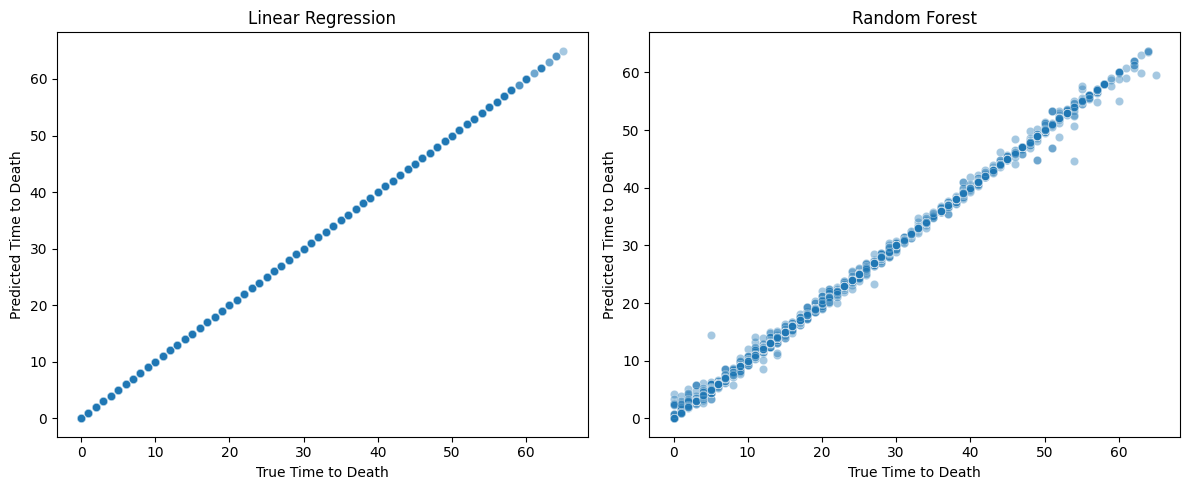

In [5]:
# --- 📦 LIBRARIES ---
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor
from sklearn import __version__ as skl_version
from packaging import version

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# --- 📂 PATHS ---
metadata_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata_with_gender.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip"

# --- 📋 LOAD METADATA ---
df_meta = pd.read_csv(metadata_path)
df_meta = df_meta.drop(columns=["image_file"], errors="ignore")
df_meta = df_meta.dropna(subset=["imdb_id", "time_to_death_at_face"])
df_meta["imdb_id"] = df_meta["imdb_id"].astype(str)

# Basic stats
print(f"✅ Metadata loaded: {df_meta.shape[0]} images across {df_meta.shape[1]} features")
actor_counts = df_meta["imdb_id"].value_counts()
print(f"🎭 Total Unique Actors: {df_meta['imdb_id'].nunique()}")
print(f"📸 Total Images: {df_meta.shape[0]}")
print(f"📊 Avg Images/Actor: {actor_counts.mean():.2f}, Median: {actor_counts.median()}, Min: {actor_counts.min()}, Max: {actor_counts.max()}, Std: {actor_counts.std():.2f}")

# --- ⚙️ ENCODER FOR CAUSE OF DEATH ---
df_meta["cause_of_death"] = df_meta["cause_of_death"].fillna("unknown")

if version.parse(skl_version) >= version.parse("1.2"):
    cause_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
else:
    cause_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

cause_encoder.fit(df_meta[["cause_of_death"]].values)

# --- 🖼️ MATCH ONE IMAGE PER METADATA ROW ---
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
images_by_id = defaultdict(list)
for f in image_files:
    imdb_id = f.split("_")[0]
    images_by_id[imdb_id].append(f)

image_records = []
for _, row in tqdm(df_meta.iterrows(), total=len(df_meta), desc="🔄 One image per metadata row"):
    imdb_id = row["imdb_id"]
    if imdb_id in images_by_id:
        image_records.append({
            **row.to_dict(),
            "image_file": images_by_id[imdb_id][0]  # pick first image available
        })

df_images = pd.DataFrame(image_records)
print(f"✅ Matched {len(df_images)} metadata-image rows across {df_images['imdb_id'].nunique()} actors")

# --- 🧼 IMAGE LOADER ---
def load_image(path, size=(64, 64)):
    try:
        img = Image.open(path).convert("L").resize(size)
        return np.array(img).flatten()
    except:
        return None

# --- 📊 FIT SCALER ON METADATA ---
numeric_meta = df_images[["age_at_face", "age_at_death"]].fillna(0)
gender_encoded_arr = (df_images["gender"].fillna("").str.lower() == "female").astype(int).values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(np.hstack([numeric_meta.values, gender_encoded_arr]))

# --- 🧠 PARALLEL FEATURE CONSTRUCTION ---
def process_row(row):
    img_path = os.path.join(image_dir, row["image_file"])
    img_array = load_image(img_path)
    if img_array is None:
        return None
    age_face = row["age_at_face"] or 0
    age_death = row["age_at_death"] or 0
    gender = str(row.get("gender", "")).lower()
    gender_encoded = 1 if gender == "female" else 0
    cause_vector = cause_encoder.transform([[row["cause_of_death"]]]).flatten()
    metadata = np.array([age_face, age_death, gender_encoded])
    metadata_scaled = scaler.transform(metadata.reshape(1, -1)).flatten()
    full_features = np.concatenate([img_array, metadata_scaled, cause_vector])
    return full_features, row["time_to_death_at_face"]

print("📸 Loading and processing images with metadata in parallel...")
with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    results = list(tqdm(executor.map(process_row, [row for _, row in df_images.iterrows()]), total=len(df_images)))

results = [r for r in results if r is not None]
X, y = zip(*results)
X = np.array(X)
y = np.array(y)

print(f"✅ Final dataset: {len(X)} usable samples, {len(df_images) - len(X)} skipped due to image load failure")
print(f"✅ Final feature matrix: {X.shape[0]} samples × {X.shape[1]} features")

# --- 🔀 SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 🤖 TRAIN MODELS ---
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- 📊 EVALUATE ---
def report(model_name, y_true, y_pred):
    print(f"\n📊 {model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")

report("Linear Regression", y_test, lr_preds)
report("Random Forest", y_test, rf_preds)

# --- 📈 PLOTS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death")
plt.title("Random Forest")

plt.tight_layout()
plt.show()

✅ Metadata loaded: 29001 images across 7 features
🎭 Total Unique Actors: 2903
📸 Total Images: 29001
📊 Avg Images/Actor: 9.99, Median: 3.0, Min: 1, Max: 540, Std: 24.02


🔄 One image per metadata row: 100%|██████████| 29001/29001 [00:01<00:00, 19641.03it/s]


✅ Matched 23613 metadata-image rows across 2254 actors
📸 Loading and processing images with metadata in parallel...


100%|██████████| 23613/23613 [04:32<00:00, 86.56it/s] 


✅ Final dataset: 23613 usable samples
✅ Final feature matrix: 23613 samples × 4436 features
\n📊 Linear Regression — R²: -4.074, MAE: 25.54
\n📊 Random Forest — R²: 0.262, MAE: 10.07


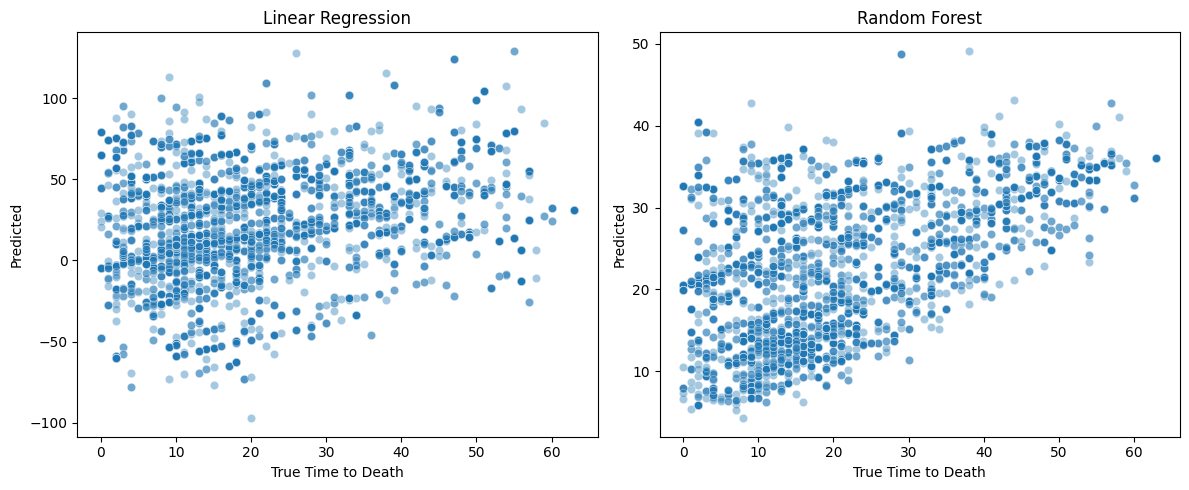

In [6]:
# --- 📦 LIBRARIES ---
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor

from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# --- 📂 PATHS ---
metadata_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata_with_gender.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip"

# --- 📋 LOAD METADATA ---
df_meta = pd.read_csv(metadata_path)
df_meta = df_meta.drop(columns=["image_file"], errors="ignore")
df_meta = df_meta.dropna(subset=["imdb_id", "time_to_death_at_face", "age_at_face"])
df_meta["imdb_id"] = df_meta["imdb_id"].astype(str)

print(f"✅ Metadata loaded: {df_meta.shape[0]} images across {df_meta.shape[1]} features")
actor_counts = df_meta["imdb_id"].value_counts()
print(f"🎭 Total Unique Actors: {df_meta['imdb_id'].nunique()}")
print(f"📸 Total Images: {df_meta.shape[0]}")
print(f"📊 Avg Images/Actor: {actor_counts.mean():.2f}, Median: {actor_counts.median()}, Min: {actor_counts.min()}, Max: {actor_counts.max()}, Std: {actor_counts.std():.2f}")

# --- ⚙️ ENCODER FOR CAUSE OF DEATH ---
df_meta["cause_of_death"] = df_meta["cause_of_death"].fillna("unknown")
cause_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
cause_encoder.fit(df_meta[["cause_of_death"]].values)

# --- 🖼️ MATCH ONE IMAGE PER METADATA ROW ---
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
images_by_id = defaultdict(list)
for f in image_files:
    imdb_id = f.split("_")[0]
    images_by_id[imdb_id].append(f)

image_records = []
for _, row in tqdm(df_meta.iterrows(), total=len(df_meta), desc="🔄 One image per metadata row"):
    imdb_id = row["imdb_id"]
    if imdb_id in images_by_id:
        image_records.append({
            **row.to_dict(),
            "image_file": images_by_id[imdb_id][0]
        })

df_images = pd.DataFrame(image_records)
print(f"✅ Matched {len(df_images)} metadata-image rows across {df_images['imdb_id'].nunique()} actors")

# --- ⚙️ SCALER SETUP ---
numeric = df_images[["age_at_face"]].fillna(0)
gender_enc = (df_images["gender"].fillna("").str.lower() == "female").astype(int).values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(np.hstack([numeric.values, gender_enc]))

# --- 🧼 IMAGE + METADATA FEATURE CONSTRUCTION ---
def load_image(path, size=(64, 64)):
    try:
        img = Image.open(path).convert("L").resize(size)
        return np.array(img).flatten()
    except:
        return None

def process_row(row):
    img_path = os.path.join(image_dir, row["image_file"])
    img_array = load_image(img_path)
    if img_array is None:
        return None
    age_face = row["age_at_face"] or 0
    gender = 1 if str(row.get("gender", "")).lower() == "female" else 0
    cause_vector = cause_encoder.transform([[row["cause_of_death"]]]).flatten()
    metadata = scaler.transform([[age_face, gender]]).flatten()
    full_features = np.concatenate([img_array, metadata, cause_vector])
    return full_features, row["time_to_death_at_face"], row["imdb_id"]

print("📸 Loading and processing images with metadata in parallel...")
with ThreadPoolExecutor(max_workers=32) as executor:
    results = list(tqdm(executor.map(process_row, [row for _, row in df_images.iterrows()]), total=len(df_images)))

results = [r for r in results if r is not None]
X, y, groups = zip(*results)
X, y, groups = np.array(X), np.array(y), np.array(groups)

print(f"✅ Final dataset: {X.shape[0]} usable samples")
print(f"✅ Final feature matrix: {X.shape[0]} samples × {X.shape[1]} features")

# --- 🔀 SPLIT BY ACTOR ---
splitter = GroupShuffleSplit(test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups=groups))
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# --- 🤖 TRAIN MODELS ---
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42).fit(X_train, y_train)

# --- 📊 EVALUATE ---
def report(name, y_true, y_pred):
    print(f"\\n📊 {name} — R²: {r2_score(y_true, y_pred):.3f}, MAE: {mean_absolute_error(y_true, y_pred):.2f}")

report("Linear Regression", y_test, lr.predict(X_test))
report("Random Forest", y_test, rf.predict(X_test))

# --- 📈 PLOTS ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr.predict(X_test), alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted"); plt.title("Linear Regression")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf.predict(X_test), alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted"); plt.title("Random Forest")

plt.tight_layout()
plt.show()


✅ Metadata loaded: 29001 images across 7 features
🎭 Total Unique Actors: 2903
📸 Total Images: 29001
📊 Avg Images/Actor: 9.99, Median: 3.0, Min: 1, Max: 540, Std: 24.02


🔄 All matching images per metadata row: 100%|██████████| 29001/29001 [00:15<00:00, 1859.19it/s]


✅ Matched 1743541 metadata-image rows across 2254 actors
📸 Loading and processing images with metadata in parallel...


100%|██████████| 1743541/1743541 [2:13:36<00:00, 217.49it/s]


✅ Final dataset: 1743541 usable samples
✅ Final feature matrix: 1743541 samples × 4436 features

📊 Linear Regression — R²: 0.332, MAE: 7.99

📊 Random Forest — R²: 0.283, MAE: 8.40


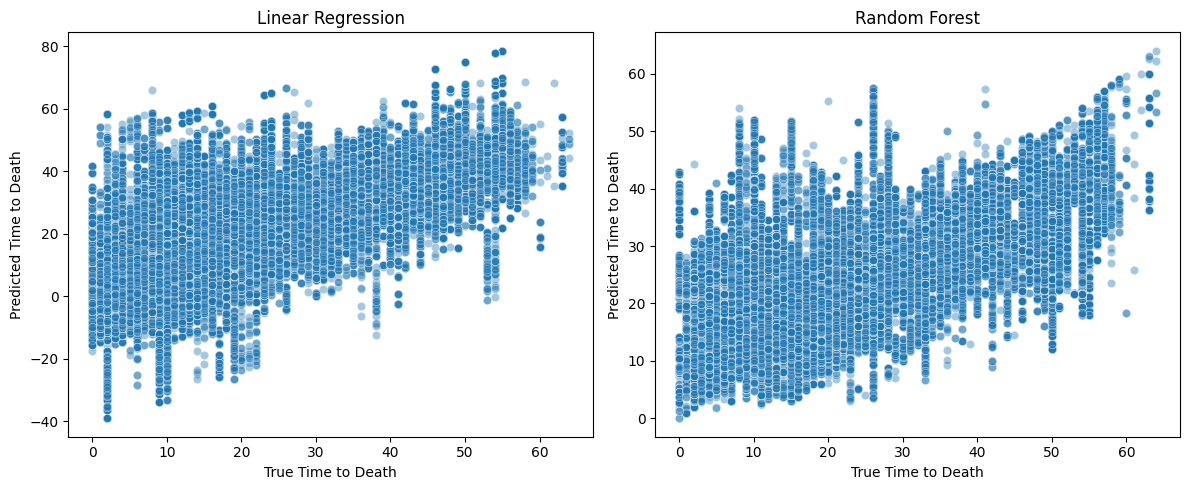

In [7]:
# --- 📦 LIBRARIES ---
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor, as_completed

from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# --- 📂 PATHS ---
metadata_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata_with_gender.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip"

# --- 📋 LOAD METADATA ---
df_meta = pd.read_csv(metadata_path)
df_meta = df_meta.drop(columns=["image_file"], errors="ignore")
df_meta = df_meta.dropna(subset=["imdb_id", "time_to_death_at_face"])
df_meta["imdb_id"] = df_meta["imdb_id"].astype(str)

print(f"✅ Metadata loaded: {df_meta.shape[0]} images across {df_meta.shape[1]} features")
actor_counts = df_meta["imdb_id"].value_counts()
print(f"🎭 Total Unique Actors: {df_meta['imdb_id'].nunique()}")
print(f"📸 Total Images: {df_meta.shape[0]}")
print(f"📊 Avg Images/Actor: {actor_counts.mean():.2f}, Median: {actor_counts.median()}, Min: {actor_counts.min()}, Max: {actor_counts.max()}, Std: {actor_counts.std():.2f}")

# --- ⚙️ ENCODER FOR CAUSE OF DEATH ---
df_meta["cause_of_death"] = df_meta["cause_of_death"].fillna("unknown")
cause_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
cause_encoder.fit(df_meta[["cause_of_death"]].values)

# --- 🖼️ MATCH ALL IMAGES PER METADATA ROW ---
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
images_by_id = defaultdict(list)
for f in image_files:
    imdb_id = f.split("_")[0]
    images_by_id[imdb_id].append(f)

image_records = []
for _, row in tqdm(df_meta.iterrows(), total=len(df_meta), desc="🔄 All matching images per metadata row"):
    imdb_id = row["imdb_id"]
    if imdb_id in images_by_id:
        for image_file in images_by_id[imdb_id]:
            image_records.append({
                **row.to_dict(),
                "image_file": image_file
            })

df_images = pd.DataFrame(image_records)
print(f"✅ Matched {len(df_images)} metadata-image rows across {df_images['imdb_id'].nunique()} actors")

# --- 🪠 IMAGE + METADATA FEATURE CONSTRUCTION ---
def load_image_and_features(row, size=(64, 64)):
    try:
        img_path = os.path.join(image_dir, row["image_file"])
        img = Image.open(img_path).convert("L").resize(size)
        img_array = np.array(img).flatten()

        age_face = row["age_at_face"] or 0
        gender = str(row.get("gender", "")).lower()
        gender_encoded = 1 if gender == "female" else 0
        cause_vector = cause_encoder.transform([[row["cause_of_death"]]]).flatten()
        metadata = np.array([age_face, gender_encoded])
        full_features = np.concatenate([img_array, metadata, cause_vector])
        return full_features, row["time_to_death_at_face"]
    except:
        return None, None

print("📸 Loading and processing images with metadata in parallel...")
X, y = [], []
with ThreadPoolExecutor(max_workers=32) as executor:
    futures = [executor.submit(load_image_and_features, row) for _, row in df_images.iterrows()]
    for future in tqdm(as_completed(futures), total=len(futures)):
        result = future.result()
        if result[0] is not None:
            X.append(result[0])
            y.append(result[1])

print(f"✅ Final dataset: {len(X)} usable samples")
X = np.array(X)
y = np.array(y)

# --- 🔄 NORMALIZE NUMERIC METADATA (last 2 before cause_of_death one-hot) ---
n_cause = cause_encoder.transform([["unknown"]]).shape[1]
scaler = StandardScaler()
X[:, -2 - n_cause : -n_cause] = scaler.fit_transform(X[:, -2 - n_cause : -n_cause])

print(f"✅ Final feature matrix: {X.shape[0]} samples × {X.shape[1]} features")

# --- 🔀 SPLIT BY ACTOR ---
splitter = GroupShuffleSplit(test_size=0.2, random_state=42)
groups = df_images["imdb_id"].values
train_idx, test_idx = next(splitter.split(X, y, groups=groups))
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# --- 🤖 TRAIN MODELS ---
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train, y_train)

# --- 📊 EVALUATE ---
def report(model_name, y_true, y_pred):
    print(f"\n📊 {model_name} — R²: {r2_score(y_true, y_pred):.3f}, MAE: {mean_absolute_error(y_true, y_pred):.2f}")

report("Linear Regression", y_test, lr.predict(X_test))
report("Random Forest", y_test, rf.predict(X_test))

# --- 📈 PLOTS ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr.predict(X_test), alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death"); plt.title("Linear Regression")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf.predict(X_test), alpha=0.4)
plt.xlabel("True Time to Death"); plt.ylabel("Predicted Time to Death"); plt.title("Random Forest")

plt.tight_layout()
plt.show()

In [8]:
# --- 🧠 XGBOOST ONLY ---
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# ✅ Train
xgbr = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgbr.fit(X_train, y_train)

# ✅ Predict
y_pred_train_xgb = xgbr.predict(X_train)
y_pred_test_xgb = xgbr.predict(X_test)

# ✅ Report
print("\n📊 XGBoost (Train) — R²: {:.3f}, MAE: {:.2f}".format(r2_score(y_train, y_pred_train_xgb), mean_absolute_error(y_train, y_pred_train_xgb)))
print("📊 XGBoost (Test)  — R²: {:.3f}, MAE: {:.2f}".format(r2_score(y_test, y_pred_test_xgb), mean_absolute_error(y_test, y_pred_test_xgb)))

# ✅ Plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train_xgb, alpha=0.4)
plt.xlabel("True Time to Death")
plt.ylabel("Predicted")
plt.title(f"XGBoost (Train)\nR²={r2_score(y_train, y_pred_train_xgb):.2f}, MAE={mean_absolute_error(y_train, y_pred_train_xgb):.2f}")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test_xgb, alpha=0.4)
plt.xlabel("True Time to Death")
plt.ylabel("Predicted")
plt.title(f"XGBoost (Test)\nR²={r2_score(y_test, y_pred_test_xgb):.2f}, MAE={mean_absolute_error(y_test, y_pred_test_xgb):.2f}")

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# --- 📊 EVALUATE ---
def report(model_name, y_true, y_pred):
    print(f"\n📊 {model_name} — R²: {r2_score(y_true, y_pred):.3f}, MAE: {mean_absolute_error(y_true, y_pred):.2f}")

models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgbr
}

for name, model in models.items():
    report(name + " (Test)", y_test, model.predict(X_test))
    report(name + " (Train)", y_train, model.predict(X_train))

# --- 📈 PLOTS ---
plt.figure(figsize=(18, 10))

for i, (name, model) in enumerate(models.items()):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    plt.subplot(3, 2, 2*i+1)
    sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.4)
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    plt.xlabel("True Time to Death")
    plt.ylabel("Predicted")
    plt.title(f"{name} (Train)\nR²={r2_train:.2f}, MAE={mae_train:.2f}")

    plt.subplot(3, 2, 2*i+2)
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.4)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    plt.xlabel("True Time to Death")
    plt.ylabel("Predicted")
    plt.title(f"{name} (Test)\nR²={r2_test:.2f}, MAE={mae_test:.2f}")

plt.tight_layout()
plt.show()

with xgboost

In [ ]:
# --- 📦 LIBRARIES ---
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor, as_completed

from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

import xgboost as xgb

# --- 📂 PATHS ---
metadata_path = "/content/drive/MyDrive/Gladyshev/data/master_metadata_with_gender.csv"
image_dir = "/content/drive/MyDrive/Gladyshev/data/imdb_crop_filtered_final_unzip"

# --- 📋 LOAD METADATA ---
df_meta = pd.read_csv(metadata_path)
df_meta = df_meta.drop(columns=["image_file"], errors="ignore")
df_meta = df_meta.dropna(subset=["imdb_id", "time_to_death_at_face"])
df_meta["imdb_id"] = df_meta["imdb_id"].astype(str)

print(f"✅ Metadata loaded: {df_meta.shape[0]} images across {df_meta.shape[1]} features")
actor_counts = df_meta["imdb_id"].value_counts()
print(f"🎭 Total Unique Actors: {df_meta['imdb_id'].nunique()}")
print(f"📸 Total Images: {df_meta.shape[0]}")
print(f"📊 Avg Images/Actor: {actor_counts.mean():.2f}, Median: {actor_counts.median()}, Min: {actor_counts.min()}, Max: {actor_counts.max()}, Std: {actor_counts.std():.2f}")

# --- ⚙️ ENCODER FOR CAUSE OF DEATH ---
df_meta["cause_of_death"] = df_meta["cause_of_death"].fillna("unknown")
cause_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
cause_encoder.fit(df_meta[["cause_of_death"]].values)

# --- 🖼️ MATCH ALL IMAGES PER METADATA ROW ---
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
images_by_id = defaultdict(list)
for f in image_files:
    imdb_id = f.split("_")[0]
    images_by_id[imdb_id].append(f)

image_records = []
for _, row in tqdm(df_meta.iterrows(), total=len(df_meta), desc="🔄 All matching images per metadata row"):
    imdb_id = row["imdb_id"]
    if imdb_id in images_by_id:
        for image_file in images_by_id[imdb_id]:
            image_records.append({
                **row.to_dict(),
                "image_file": image_file
            })

df_images = pd.DataFrame(image_records)
print(f"✅ Matched {len(df_images)} metadata-image rows across {df_images['imdb_id'].nunique()} actors")

# --- 🪠 IMAGE + METADATA FEATURE CONSTRUCTION ---
def load_image_and_features(row, size=(64, 64)):
    try:
        img_path = os.path.join(image_dir, row["image_file"])
        img = Image.open(img_path).convert("L").resize(size)
        img_array = np.array(img).flatten()

        age_face = row["age_at_face"] or 0
        gender = str(row.get("gender", "")).lower()
        gender_encoded = 1 if gender == "female" else 0
        cause_vector = cause_encoder.transform([[row["cause_of_death"]]]).flatten()
        metadata = np.array([age_face, gender_encoded])
        full_features = np.concatenate([img_array, metadata, cause_vector])
        return full_features, row["time_to_death_at_face"]
    except:
        return None, None

print("📸 Loading and processing images with metadata in parallel...")
X, y = [], []
with ThreadPoolExecutor(max_workers=32) as executor:
    futures = [executor.submit(load_image_and_features, row) for _, row in df_images.iterrows()]
    for future in tqdm(as_completed(futures), total=len(futures)):
        result = future.result()
        if result[0] is not None:
            X.append(result[0])
            y.append(result[1])

print(f"✅ Final dataset: {len(X)} usable samples")
X = np.array(X)
y = np.array(y)

# --- 🔄 NORMALIZE NUMERIC METADATA (last 2 before cause_of_death one-hot) ---
n_cause = cause_encoder.transform([["unknown"]]).shape[1]
scaler = StandardScaler()
X[:, -2 - n_cause : -n_cause] = scaler.fit_transform(X[:, -2 - n_cause : -n_cause])

print(f"✅ Final feature matrix: {X.shape[0]} samples × {X.shape[1]} features")

# --- 🔀 SPLIT BY ACTOR ---
splitter = GroupShuffleSplit(test_size=0.2, random_state=42)
groups = df_images["imdb_id"].values
train_idx, test_idx = next(splitter.split(X, y, groups=groups))
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# --- 🤖 TRAIN MODELS ---
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train, y_train)
xgbr = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train, y_train)

# --- 📊 EVALUATE ---
def report(model_name, y_true, y_pred):
    print(f"\n📊 {model_name} — R²: {r2_score(y_true, y_pred):.3f}, MAE: {mean_absolute_error(y_true, y_pred):.2f}")

models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgbr
}

for name, model in models.items():
    report(name + " (Test)", y_test, model.predict(X_test))
    report(name + " (Train)", y_train, model.predict(X_train))

# --- 📈 PLOTS ---
plt.figure(figsize=(18, 10))

for i, (name, model) in enumerate(models.items()):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    plt.subplot(3, 2, 2*i+1)
    sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.4)
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    plt.xlabel("True Time to Death")
    plt.ylabel("Predicted")
    plt.title(f"{name} (Train)\nR²={r2_train:.2f}, MAE={mae_train:.2f}")

    plt.subplot(3, 2, 2*i+2)
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.4)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    plt.xlabel("True Time to Death")
    plt.ylabel("Predicted")
    plt.title(f"{name} (Test)\nR²={r2_test:.2f}, MAE={mae_test:.2f}")

plt.tight_layout()
plt.show()
